In [98]:
!pip install --upgrade pip
!pip install hazm
!pip install googletrans==4.0.0-rc1
!pip install -q transformers
!pip install -q clean-text[gpl]

In [99]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = 'drive/MyDrive/datamining/dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd
import string
import re
import hazm
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from googletrans import Translator
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
from gensim.models import Word2Vec
from mpl_toolkits import mplot3d
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

## load dataset

In [101]:
df = pd.read_csv(dataset_path)

In [102]:
df

id                                              title  \
0      1  ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
1      2    بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی   
2      3  بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...   
3      4  توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
4      5  تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..   ...                                                ...   
155  156  تاملی در مولفه های برنامه درسی ریاضی مدرسه ای ...   
156  157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
157  158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
158  159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
159  160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                                  text        author language  \
0    این مقاله می کوشد با ارایه مدلی جامع از مولفه ...  فرنوش اعلامی  Persian   
1    هدف این پژوهش بررسی تحولات رشته مدیریت آموزشی ...  فرنوش اعلامی  Persian   
2    پژوهش حاضر با هدف شناسایی و بررسی چالش‌های آمو...  فرنوش اعلامی  Persian   
3    امروزه استقرار و توسعه زیست بوم کارآفرینی دانش...  فرنوش اعلامی  Persian   
4    تحليل عوامل دلبستگي شغلي کارکنان دانشگاه شهيد ...  فرنوش اعلامی  Persian   
..                                                 ...           ...      ...   
155  این مطالعه به دنبال تبیین ملاک ها و نشانگرهای ...     زهرا گویا  Persian   
156  \nتبیین چالش های اجرای ارزشیابی توصیفی برای در...     زهرا گویا  Persian   
157  \nبررسی مباحث مالی در کتاب های درسی ریاضی دهه ...     زهرا گویا  Persian   
158  هدف این پژوهش، بررسی تاثیر استفاده از راهبرد ر...     زهرا گویا  Persian   
159  \r\nبا گذشت بیش از 15 سال که از اجرای طرح ارزش...     زهرا گویا  Persian   

                                              keywords  
0            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور  
1    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...  
2    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...  
3    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...  
4    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...  
..                                                 ...  
155  \nبرنامه درسی ریاضی ، بنیان های منطقی یادگیری ...  
156             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی  
157  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...  
158  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...  
159  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...  

[160 rows x 6 columns]

In [103]:
df.set_index('id' , inplace = True)

In [104]:
df

title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
156  تاملی در مولفه های برنامه درسی ریاضی مدرسه ای ...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                                  text        author language  \
id                                                                              
1    این مقاله می کوشد با ارایه مدلی جامع از مولفه ...  فرنوش اعلامی  Persian   
2    هدف این پژوهش بررسی تحولات رشته مدیریت آموزشی ...  فرنوش اعلامی  Persian   
3    پژوهش حاضر با هدف شناسایی و بررسی چالش‌های آمو...  فرنوش اعلامی  Persian   
4    امروزه استقرار و توسعه زیست بوم کارآفرینی دانش...  فرنوش اعلامی  Persian   
5    تحليل عوامل دلبستگي شغلي کارکنان دانشگاه شهيد ...  فرنوش اعلامی  Persian   
..                                                 ...           ...      ...   
156  این مطالعه به دنبال تبیین ملاک ها و نشانگرهای ...     زهرا گویا  Persian   
157  \nتبیین چالش های اجرای ارزشیابی توصیفی برای در...     زهرا گویا  Persian   
158  \nبررسی مباحث مالی در کتاب های درسی ریاضی دهه ...     زهرا گویا  Persian   
159  هدف این پژوهش، بررسی تاثیر استفاده از راهبرد ر...     زهرا گویا  Persian   
160  \r\nبا گذشت بیش از 15 سال که از اجرای طرح ارزش...     زهرا گویا  Persian   

                                              keywords  
id                                                      
1            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور  
2    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...  
3    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...  
4    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...  
5    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...  
..                                                 ...  
156  \nبرنامه درسی ریاضی ، بنیان های منطقی یادگیری ...  
157             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی  
158  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...  
159  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...  
160  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...  

[160 rows x 5 columns]

In [105]:
print('data information', '\n')
print(df.info(), '\n')

# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

print('data shape')
print(df.shape)

data information 

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1 to 160
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     160 non-null    object
 1   text      160 non-null    object
 2   author    160 non-null    object
 3   language  160 non-null    object
 4   keywords  159 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB
None 

missing values stats
title       0
text        0
author      0
language    0
keywords    1
dtype: int64 

data shape
(160, 5)


In [106]:
df.describe()

title  \
count                                                 160   
unique                                                158   
top     آسیب شناسی برنامه های آموزش مداوم پرستاران: یک...   
freq                                                    2   

                                                     text        author  \
count                                                 160           160   
unique                                                160            19   
top     این مقاله می کوشد با ارایه مدلی جامع از مولفه ...  محمد قهرمانی   
freq                                                    1            24   

       language                                           keywords  
count       160                                                159  
unique        3                                                156  
top     Persian  چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...  
freq        136                                                  2

In [107]:
print('unique language')
print(df['language'].unique(), '\n')

print('unique author\n')
print(df['author'].unique(), '\n')

unique language
['Persian' 'En' ' Persian'] 

unique author

['فرنوش اعلامی' 'غلامرضا شمس' 'محمود ابوالقاسمی' 'محبوبه عارفی'
 'جمیله علم الهدی' 'محمد قهرمانی' 'محمد یمنی دوزی سرخابی'
 'رضا محمدی چابکی' 'مرتضی رضائی زاده' 'اسماعیل جعفری' 'نسیم اصغری'
 ' محمدرضا سرمدي' 'ابراهیم ریحانی' 'محمد رضا فدایی' 'اباصلت خراسانی'
 'کوروش فتحی' 'علی دلاور' 'علیرضا کیامنش' 'زهرا گویا'] 



### 0. convert type object to string

In [108]:
df["title"] = df["title"].astype("string")
df["text"] = df["text"].astype("string")
df["author"] = df["author"].astype("string")
df["language"] = df["language"].astype("string")
df["keywords"] = df["keywords"].astype("string")

In [109]:
print('data information', '\n')
print(df.info(), '\n')

data information 

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1 to 160
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     160 non-null    string
 1   text      160 non-null    string
 2   author    160 non-null    string
 3   language  160 non-null    string
 4   keywords  159 non-null    string
dtypes: string(5)
memory usage: 7.5 KB
None 



### 1. translate to persian



In [110]:
def translate_to_persian(text):
    translated_text = ''
    translator = Translator()
    for sentence in text.split('.'):
      # continue if sentece is empty
      if len(sentence.strip()) <= 1:
        continue
      translated_text += translator.translate(sentence, src='en', dest='fa').text + ' '
    return translated_text

In [111]:
# example
translate_to_persian('Hello, How are you?')

'سلام حال شما چطور؟ '

In [112]:
english_rows = df.loc[df['language'] == 'En']

In [113]:
english_rows['text']

id
6      Aim and Introduction: Where, according to the ...
8      This study aimed to investigate the effect of ...
36     The current literature on flipped classrooms o...
63     Background and purpose: Hierarchical decision-...
64     The objective of this paper is to analytically...
65     The purpose of this paper is to investigate st...
66     Background & Objective: To ensure students res...
67     Since the merging of organizations and institu...
68     BACKGROUND AND OBJECTIVE: The development and ...
69     Background: The comprehensive evaluation progr...
70     What title one can give to Pierre Bourdieu? So...
71     Objectives: The current research has been carr...
72     In a scientific field such as a university, th...
73     This paper aims to study and structural pathol...
74     Regarding the fact that higher education is on...
75     The doctoral program plays an important role i...
76     The purpose of this study is to compare the of...
104    Objective: At present

In [114]:
english_rows['text'] = english_rows['text'].apply(translate_to_persian)

<ipython-input-114-71c09b36a05f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_rows['text'] = english_rows['text'].apply(translate_to_persian)


In [115]:
df.loc[df['language'] == 'En', 'text'] = english_rows
english_rows

title  \
id                                                       
6         Lived experience of university startup teams   
8    The effect of technology-based entrepreneurshi...   
36   Identifying barriers to using flipped class in...   
63   Function of Board of Trustees in Iranian State...   
64   An Analytical Study of Aspects and Components ...   
65   Looking for value through networked learning i...   
66   Students Satisfaction of Thesis Conducting Pro...   
67   An analysis of merging effects on academic cul...   
68   Faculty development strategies based on the de...   
69   The outcomes of faculty development based on e...   
70   Reflection on academic activities at universit...   
71   University Pedagogy: A Neglected Phenomenon in...   
72   The Concept of Scientific Capital in the Acade...   
73   Structural pathology of autonomous campus of T...   
74   Functional pathology of autonomous campuses of...   
75                     Doctoral Supervision Stylistics   
76   Comparison of strategic planning documents in ...   
104  Designing Strategy Map and Performance Measure...   
106  The challenges of post-COVID age in Iranian hi...   

                                                  text                 author  \
id                                                                              
6    هدف و مقدمه: در جایی که ، به گفته دیده بان کار...           فرنوش اعلامی   
8    این مطالعه با هدف بررسی تأثیر آموزش کارآفرینی ...           فرنوش اعلامی   
36   ادبیات فعلی در مورد کلاسهای درس ، بینش محدودی ...        جمیله علم الهدی   
63   سابقه و هدف: نهادهای تصمیم گیری سلسله مراتبی د...  محمد یمنی دوزی سرخابی   
64   هدف از این مقاله ، مطالعه به صورت تحلیلی آثار ...  محمد یمنی دوزی سرخابی   
65   هدف از این مقاله بررسی استراتژی های شبکه های ا...  محمد یمنی دوزی سرخابی   
66   زمینه و هدف و هدف: اطمینان از کسب تجربه تحقیق ...  محمد یمنی دوزی سرخابی   
67   از آنجا که ادغام سازمانها و نهادها تأثیرات غیر...  محمد یمنی دوزی سرخابی   
68   سابقه و هدف و هدف: برنامه توسعه و نوآوری در آم...  محمد یمنی دوزی سرخابی   
69   سابقه و هدف: برنامه ارزیابی جامع سیستم بهداشت ...  محمد یمنی دوزی سرخابی   
70   چه عنوانی می تواند به پیر بوردیو بدهد؟جامعه شن...  محمد یمنی دوزی سرخابی   
71   اهداف: تحقیقات فعلی برای شناسایی و توصیف ابعاد...  محمد یمنی دوزی سرخابی   
72   در یک زمینه علمی مانند دانشگاه ، همیشه تلاش بر...  محمد یمنی دوزی سرخابی   
73   این مقاله با هدف مطالعه و آسیب شناسی ساختاری پ...  محمد یمنی دوزی سرخابی   
74   با توجه به این واقعیت که آموزش عالی یکی از نها...  محمد یمنی دوزی سرخابی   
75   برنامه دکتری نقش مهمی در اجرای مأموریت های دان...  محمد یمنی دوزی سرخابی   
76   هدف از این مطالعه ، مقایسه اسناد رسمی برنامه ر...  محمد یمنی دوزی سرخابی   
104  هدف: در حال حاضر ، دستیابی به یک اقتصاد دانش ب...          اسماعیل جعفری   
106  شرایط ناشی از گسترش COVID-19 ، آموزش عالی را و...          اسماعیل جعفری   

    language                                           keywords  
id                                                               
6         En        دانشگاه استارتاپ نوا طرح دانشگاه شهید بهشتی  
8         En  آموزش کارآفرینی دانش آموزان کلاس ششم کار و فنا...  
36        En                  چالش های آموزش عالی کلاس درس تحول  
63        En              هیئت امنا، دانشگاه علوم پزشکی، عملکرد  
64        En  تحقیقات نهادی، برنامه ریزی توسعه دانشگاه، مدیر...  
65        En  یادگیری شبکه ای، استراتژی های شبکه، ایجاد ارزش...  
66        En             رضایت، انجام پایان نامه، فرآیند دانشجو  
67        En  ادغام فرهنگ دانشگاهی، دانشگاه شهید عباسپور، دا...  
68        En  توسعه، اعضای هیئت علمی، نوآوری، آموزش پزشکی، ا...  
69        En                             نظام سلامت، آموزش عالی  
70        En            فعالیت علمی دانشگاه خشونت نمادین بازتاب  
71        En                    ابعاد آموزش عالی آموزش دانشگاهی  
72        En  حوزه دانشگاهی بازیگران دانشگاه سرمایه علمی پیر...  
73        En  آسیب شناسی ساختاری تمرکز پیچیدگی تشریفات پردیس...  
74        En           آموزش، پژوهش، خدمات خاص، پردیس های مستقل  
75    

### remove duplicates

In [116]:
df = df.dropna(subset=['title'])
df = df.dropna(subset=['text'])
df = df.dropna(subset=['keywords'])
df = df.drop_duplicates(subset=['title'], keep='first')

### 1.2 Add Title to text

#### translate english title and append to text column

In [117]:
translated_title = df.loc[df['language'] == 'En', 'title'].apply(translate_to_persian)
translated_title

id
6                تجربه زندگی تیم های راه اندازی دانشگاه 
8      تأثیر آموزش کارآفرینی مبتنی بر فناوری بر توانم...
36     شناسایی موانع استفاده از کلاس تلنگر در آموزش ع...
63     عملکرد هیئت امنای در دانشگاه های علوم پزشکی ای...
64     یک مطالعه تحلیلی از جنبه ها و مؤلفه های تحقیقا...
65     به دنبال ارزش از طریق یادگیری شبکه ای در زمینه...
66     رضایت دانشجویان از فرآیند انجام پایان نامه و ع...
67          تجزیه و تحلیل اثرات ادغام بر فرهنگ دانشگاهی 
68     استراتژی های توسعه دانشکده بر اساس برنامه های ...
69     نتایج توسعه دانشکده بر اساس برنامه تکامل و نوآ...
70     تأمل در فعالیت های دانشگاهی در دانشگاه ها از د...
71     آموزش دانشگاه: یک پدیده غفلت شده در سیستم آموز...
72     مفهوم سرمایه علمی در حوزه دانشگاهی: چشم انداز ...
73     آسیب شناسی ساختاری پردیس خودمختار دانشگاههای د...
74     آسیب شناسی عملکردی پردیس های خودمختار دانشگاه ...
75                                سبک شناسی نظارت دکتری 
76     مقایسه اسناد برنامه ریزی استراتژیک در دانشگاه ...
104    طراحی نقشه استراتژی و

In [118]:
df.loc[df['language'] == 'En', 'text'] = translated_title +'\n'+ df.loc[df['language'] == 'En', 'text']

#### append Persian title to text

In [119]:
df.loc[df['language'] == 'Persian', 'text'] = df.loc[df['language'] == 'Persian', 'title'] + '\n' + df.loc[df['language'] == 'Persian', 'text']

#### show dataset

In [120]:
df

title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                                  text        author language  \
id                                                                              
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  فرنوش اعلامی  Persian   
2    بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیف...  فرنوش اعلامی  Persian   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...  فرنوش اعلامی  Persian   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  فرنوش اعلامی  Persian   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  فرنوش اعلامی  Persian   
..                                                 ...           ...      ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...     زهرا گویا  Persian   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...     زهرا گویا  Persian   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...     زهرا گویا  Persian   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...     زهرا گویا  Persian   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...     زهرا گویا  Persian   

                                              keywords  
id                                                      
1            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور  
2    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...  
3    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...  
4    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...  
5    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...  
..                                                 ...  
155  برنامه درسی ریاضی ، سیاست ، ایدئولوژی ، تغییرا...  
157             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی  
158  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...  
159  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...  
160  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...  

[157 rows x 5 columns]

### 2. remove punctuation


In [121]:
def remove_punctuation_one(text):
    punctuation_one = "".join([i for i in text if i not in [".", "!", "#", "\"", "(",
                                                            ")", "*", ",",  "-", ".",
                                                            "/", ":", "[",  "]","«",
                                                            "»", "،","؛", "؟"]])
    return punctuation_one

def remove_punctuation_two(text):
     punctuation_two = "".join([i for i in text if i not in string.punctuation])

     return punctuation_two

In [122]:
df['cleaned_text'] = df['text'].apply(lambda x: remove_punctuation_one(x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_punctuation_two(x))

In [123]:
df['cleaned_title'] = df['title'].apply(lambda x: remove_punctuation_one(x))
df['cleaned_title'] = df['cleaned_title'].apply(lambda x: remove_punctuation_two(x))

In [124]:
df['cleaned_keywords'] = df['keywords'].apply(lambda x: remove_punctuation_one(x))
df['cleaned_keywords'] = df['cleaned_keywords'].apply(lambda x: remove_punctuation_two(x))

In [125]:
df

title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                                  text        author language  \
id                                                                              
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  فرنوش اعلامی  Persian   
2    بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیف...  فرنوش اعلامی  Persian   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...  فرنوش اعلامی  Persian   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  فرنوش اعلامی  Persian   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  فرنوش اعلامی  Persian   
..                                                 ...           ...      ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...     زهرا گویا  Persian   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...     زهرا گویا  Persian   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...     زهرا گویا  Persian   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...     زهرا گویا  Persian   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...     زهرا گویا  Persian   

                                              keywords  \
id                                                       
1            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور   
2    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...   
3    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...   
4    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...   
5    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...   
..                                                 ...   
155  برنامه درسی ریاضی ، سیاست ، ایدئولوژی ، تغییرا...   
157             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی   
158  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...   
159  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...   
160  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...   

                                          cleaned_text  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2    بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی...   
3    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                         cleaned_title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2       بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی   
3    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک ک

In [126]:
def preprocess(text):
    text = text.lower()
    text=text.strip()
    text=re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [127]:
df['preprocessed_text']= df['cleaned_text'].apply(lambda x:preprocess(x))
df['preprocessed_title']= df['cleaned_title'].apply(lambda x:preprocess(x))
df['preprocessed_keywords']= df['cleaned_keywords'].apply(lambda x:preprocess(x))

In [128]:
df

title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                                  text        author language  \
id                                                                              
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  فرنوش اعلامی  Persian   
2    بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیف...  فرنوش اعلامی  Persian   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...  فرنوش اعلامی  Persian   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  فرنوش اعلامی  Persian   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  فرنوش اعلامی  Persian   
..                                                 ...           ...      ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...     زهرا گویا  Persian   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...     زهرا گویا  Persian   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...     زهرا گویا  Persian   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...     زهرا گویا  Persian   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...     زهرا گویا  Persian   

                                              keywords  \
id                                                       
1            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور   
2    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...   
3    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...   
4    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...   
5    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...   
..                                                 ...   
155  برنامه درسی ریاضی ، سیاست ، ایدئولوژی ، تغییرا...   
157             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی   
158  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...   
159  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...   
160  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...   

                                          cleaned_text  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2    بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی...   
3    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                         cleaned_title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2       بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی   
3    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک ک

### 3. remove url

In [129]:
url_pattern = re.compile(r'https?://\S+')

def sub_url(text):
    return url_pattern.sub('', text)

In [130]:
df['suburl_text'] = df['preprocessed_text'].apply(sub_url)
df['suburl_title'] = df['preprocessed_title'].apply(sub_url)
df['suburl_keywords'] = df['preprocessed_keywords'].apply(sub_url)

In [131]:
df

title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                                  text        author language  \
id                                                                              
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  فرنوش اعلامی  Persian   
2    بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیف...  فرنوش اعلامی  Persian   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...  فرنوش اعلامی  Persian   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  فرنوش اعلامی  Persian   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  فرنوش اعلامی  Persian   
..                                                 ...           ...      ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...     زهرا گویا  Persian   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...     زهرا گویا  Persian   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...     زهرا گویا  Persian   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...     زهرا گویا  Persian   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...     زهرا گویا  Persian   

                                              keywords  \
id                                                       
1            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور   
2    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...   
3    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...   
4    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...   
5    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...   
..                                                 ...   
155  برنامه درسی ریاضی ، سیاست ، ایدئولوژی ، تغییرا...   
157             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی   
158  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...   
159  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...   
160  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...   

                                          cleaned_text  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2    بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی...   
3    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                         cleaned_title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2       بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی   
3    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک ک

### 4. Tokenization

In [132]:
tokenizer = hazm.WordTokenizer()
df['tokens'] = df['suburl_text'].apply(tokenizer.tokenize)
df['keywords_tokens'] = df['suburl_keywords'].apply(tokenizer.tokenize)

In [133]:
df

title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                                  text        author language  \
id                                                                              
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  فرنوش اعلامی  Persian   
2    بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیف...  فرنوش اعلامی  Persian   
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...  فرنوش اعلامی  Persian   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  فرنوش اعلامی  Persian   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  فرنوش اعلامی  Persian   
..                                                 ...           ...      ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...     زهرا گویا  Persian   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...     زهرا گویا  Persian   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...     زهرا گویا  Persian   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...     زهرا گویا  Persian   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...     زهرا گویا  Persian   

                                              keywords  \
id                                                       
1            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور   
2    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...   
3    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...   
4    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...   
5    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...   
..                                                 ...   
155  برنامه درسی ریاضی ، سیاست ، ایدئولوژی ، تغییرا...   
157             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی   
158  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...   
159  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...   
160  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...   

                                          cleaned_text  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2    بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی...   
3    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                         cleaned_title  \
id                                                       
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
2       بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی   
3    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
160  ضرورت تدوین معیارهای روبریک ک

In [134]:
df.to_csv('tokenized_df.csv')

In [135]:
token_df = pd.read_csv('tokenized_df.csv')

In [136]:
token_df['tokens'].astype("string")

0      ['ارزیابی', 'میزان', 'آمادگی', 'مدارس', 'ابتدا...
1      ['بررسی', 'تحولات', 'رشته', 'مدیریت', 'آموزشی'...
2      ['بررسی', 'چالش', 'های', 'آموزشی', 'پژوهشی', '...
3      ['توسعه', 'زیست', 'بوم', 'کارآفرینی', 'دانشجوی...
4      ['تحلیل', 'عوامل', 'دلبستگی', 'شغلی', 'کارکنان...
                             ...                        
152    ['تجربه', 'زیسته', 'یک', 'متخصص', 'برنامه', 'د...
153    ['چالش', 'های', 'اجرای', 'ارزشیابی', 'توصیفی',...
154    ['ارتقای', 'سواد', 'مالی', 'و', 'تصمیم', 'گیری...
155    ['تاثیر', 'استفاده', 'از', 'راهبرد', 'رسم', 'ش...
156    ['ضرورت', 'تدوین', 'معیارهای', 'روبریک', 'کیفی...
Name: tokens, Length: 157, dtype: string

### 5. read persian stopwords

In [137]:
stopwords_path = 'drive/MyDrive/datamining/persian.txt'
with open(stopwords_path, 'r', encoding='utf-8') as file:
    content = file.read()
content = content.replace('\n', ',')

In [138]:
persian_list = content.split(',')
persian_list

['\ufeff!',
 '"',
 '#',
 '(',
 ')',
 '*',
 '',
 '',
 '-',
 '.',
 '/',
 ':',
 '[',
 ']',
 '«',
 '»',
 '،',
 '؛',
 '؟',
 'آباد',
 'آخ',
 'آخر',
 'آخرها',
 'آخه',
 'آدمهاست',
 'آرام',
 'آرام آرام',
 'آره',
 'آری',
 'آزادانه',
 'آسان',
 'آسیب پذیرند',
 'آشنایند',
 'آشکارا',
 'آقا',
 'آقای',
 'آقایان',
 'آمد',
 'آمدن',
 'آمده',
 'آمرانه',
 'آن',
 'آن گاه',
 'آنان',
 'آنانی',
 'آنجا',
 'آنرا',
 'آنطور',
 'آنقدر',
 'آنها',
 'آنهاست',
 'آنچنان',
 'آنچنان که',
 'اونجور',
 'اونجوری',
 'اونجوری که',
 'آنچه',
 'آنکه',
 'آنگاه',
 'آن\u200cها',
 'آهان',
 'آهای',
 'آور',
 'آورد',
 'آوردن',
 'آورده',
 'آوه',
 'آی',
 'آیا',
 'آید',
 'آیند',
 'ا',
 'اتفاقا',
 'اثرِ',
 'اجراست',
 'احتراما',
 'احتمالا',
 'احیاناً',
 'اخیر',
 'اخیراً',
 'اری',
 'از',
 'از آن پس',
 'از بس که',
 'از جمله',
 'ازاین رو',
 'ازجمله',
 'ازش',
 'اساسا',
 'اساساً',
 'است',
 'استفاد',
 'استفاده',
 'اسلامی اند',
 'اش',
 'اشتباها',
 'اشکارا',
 'اصلا',
 'اصلاً',
 'اصولا',
 'اصولاً',
 'اعلام',
 'اغلب',
 'افزود',
 'افسوس',
 'اقل',
 'اقلی

### 6. remove stopwords


In [139]:
def stopword(word_list):
     word_list = eval(word_list)
     return [word for word in word_list if word not in persian_list]

In [140]:
token_df['stopwords'] = token_df['tokens'].apply(lambda x:stopword(x))
token_df['keys'] = token_df['keywords_tokens'].apply(lambda x:stopword(x))

In [141]:
token_df['stopwords']

0      [ارزیابی, آمادگی, مدارس, ابتدایی, شهر, تهران, ...
1      [بررسی, تحولات, مدیریت, آموزشی, مطالعه, کیفی, ...
2      [بررسی, چالش, آموزشی, پژوهشی, سازمانی, اعضای, ...
3      [توسعه, زیست, بوم, کارآفرینی, دانشجویی, رویکرد...
4      [تحلیل, عوامل, دلبستگی, شغلی, کارکنان, دانشگاه...
                             ...                        
152    [تجربه, زیسته, متخصص, برنامه, درسی, ریاضی, تلف...
153    [چالش, اجرای, ارزشیابی, توصیفی, درس, ریاضی, دو...
154    [ارتقای, سواد, مالی, تصمیم, مالی, برنامه, درسی...
155    [تاثیر, راهبرد, رسم, شکل, حل, مسایل, کلامی, ری...
156    [ضرورت, تدوین, معیارهای, روبریک, کیفی, اجرای, ...
Name: stopwords, Length: 157, dtype: object

In [142]:
token_df['keys']

0         [ارزیابی, مدارس, ابتدایی, مدیریت, مدرسه, محور]
1      [تحولات, مدیریت, آموزشی, نقاط, قوت, ضعف, فرصت,...
2      [چالشهای, آموزشی, چالشهای, پژوهشی, چالشهای, سا...
3      [زیست, بوم, کارآفرینی, کارآفرینی, دانشجویی, اس...
4      [دلبستگی, کارکنان, وفاداری, سازمانی, دانشگاه, ...
                             ...                        
152    [برنامه, درسی, ریاضی, سیاست, ایدئولوژی, تغییرا...
153             [ارزشیابی, توصیفی, ریاضی, دوره, ابتدائی]
154    [سواد, مالی, تصمیم, مالی, ابزار, مالی, برنامه,...
155    [رسم, شکل, راهبرد, حل, مسئله, شکل, شبکه, سلسله...
156    [طرح, ارزشیابی, توصیفی, روبریک, کیفی, معلمان, ...
Name: keys, Length: 157, dtype: object

### 7. lemmatization

In [143]:
def lemmatization(words):
    lemmatizer = hazm.Lemmatizer()
    word_lst = []
    for word in words:
        word_lst.append(lemmatizer.lemmatize(word))
    return word_lst

In [144]:
token_df['lemmatized_tokens'] = token_df['stopwords'].apply(lemmatization)
token_df['lemmatized_keywords'] = token_df['keys'].apply(lemmatization)

In [145]:
token_df['lemmatized_tokens']

0      [ارزیابی, آمادگی, مدارس, ابتدایی, شهر, تهران, ...
1      [بررسی, تحولات, مدیریت, آموزشی, مطالعه, کیفی, ...
2      [بررسی, چالش, آموزشی, پژوهشی, سازمانی, اعضا, ه...
3      [توسعه, زیست# زیو, بوم, کارآفرینی, دانشجویی, ر...
4      [تحلیل, عوامل, دلبستگی, شغل, کارکنان, دانشگاه,...
                             ...                        
152    [تجربه, زیسته, متخصص, برنامه, درس, ریاضی, تلفی...
153    [چالش, اجرای, ارزشیابی, توصیف, درس, ریاضی, دور...
154    [ارتقا, سواد, مالی, تصمیم, مالی, برنامه, درس, ...
155    [تاثیر, راهبرد, رسم, شکل, حل, مسایل, کلامی, ری...
156    [ضرورت, تدوین, معیار, روبریک, کیفی, اجرای, موف...
Name: lemmatized_tokens, Length: 157, dtype: object

In [146]:
token_df['lemmatized_keywords']

0         [ارزیابی, مدارس, ابتدایی, مدیریت, مدرسه, محور]
1      [تحولات, مدیریت, آموزشی, نقاط, قوت, ضعف, فرصت,...
2      [چالش, آموزشی, چالش, پژوهشی, چالش, سازمانی, اع...
3      [زیست# زیو, بوم, کارآفرینی, کارآفرینی, دانشجوی...
4      [دلبستگی, کارکنان, وفاداری, سازمانی, دانشگاه, ...
                             ...                        
152    [برنامه, درس, ریاضی, سیاست, ایدئولوژی, تغییرات...
153              [ارزشیابی, توصیف, ریاضی, دوره, ابتدائی]
154    [سواد, مالی, تصمیم, مالی, ابزار, مالی, برنامه,...
155    [رسم, شکل, راهبرد, حل, مسئله, شکل, شبکه, سلسله...
156    [طرح, ارزشیابی, توصیف, روبریک, کیفی, معلمان, د...
Name: lemmatized_keywords, Length: 157, dtype: object

In [216]:
token_df.to_csv('drive/MyDrive/datamining/tokenized_df.csv')

In [240]:
token_df = pd.read_csv('drive/MyDrive/datamining/tokenized_df.csv')

In [241]:
token_df

Unnamed: 0.1  Unnamed: 0   id  \
0               0           0    1   
1               1           1    2   
2               2           2    3   
3               3           3    4   
4               4           4    5   
..            ...         ...  ...   
152           152         152  155   
153           153         153  157   
154           154         154  158   
155           155         155  159   
156           156         156  160   

                                                 title  \
0    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
1      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی   
2    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...   
3    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
4    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
152  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
153  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
154  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
155  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
156  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                                  text        author language  \
0    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  فرنوش اعلامی  Persian   
1    بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیف...  فرنوش اعلامی  Persian   
2    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...  فرنوش اعلامی  Persian   
3    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  فرنوش اعلامی  Persian   
4    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  فرنوش اعلامی  Persian   
..                                                 ...           ...      ...   
152  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...     زهرا گویا  Persian   
153  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...     زهرا گویا  Persian   
154  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...     زهرا گویا  Persian   
155  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...     زهرا گویا  Persian   
156  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...     زهرا گویا  Persian   

                                              keywords  \
0            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور   
1    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...   
2    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...   
3    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...   
4    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...   
..                                                 ...   
152  برنامه درسی ریاضی ، سیاست ، ایدئولوژی ، تغییرا...   
153             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی   
154  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...   
155  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...   
156  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...   

                                          cleaned_text  \
0    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...   
1    بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی...   
2    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...   
3    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...   
4    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...   
..                                                 ...   
152  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...   
153  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...   
154  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...   
155  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...   
156  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...   

                                         cleaned_title  ...  \
0    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  ...   
1       بررسی تحولات رشته مدیریت آموزشی یک مطالعه کیفی  ...   
2    بررسی چالش های آموزشی  پژوهشی و سازمانیِ اعضای...  ...   
3    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  ...   
4    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  ...   
..                                                 ...  ...   
152  تجربه زیسته یک متخصص برنامه درسی ریاضی

In [258]:
def get_all_tokens(processed_text):
  all_vocabs = []
  for ls in processed_text:
    all_vocabs.append(' '.join(ls))

  return all_vocabs

In [259]:
token_df['lemmatized_tokens'] = token_df['lemmatized_tokens'].apply(eval)
token_df['lemmatized_keywords'] = token_df['lemmatized_keywords'].apply(eval)


all_vocabs = get_all_tokens(token_df['lemmatized_tokens'])
all_keywords = get_all_tokens(token_df['lemmatized_keywords'])

In [261]:
all_keywords

['ارزیابی مدارس ابتدایی مدیریت مدرسه محور',
 'تحولات مدیریت آموزشی نقاط قوت ضعف فرصت تهدید',
 'چالش آموزشی چالش پژوهشی چالش سازمانی اعضا هیأت علمی تازهکار دانشگاه قندهار',
 'زیست# زیو بوم کارآفرینی کارآفرینی دانشجویی استارتاپ رویداد نوآوری آزمایشگاه زنده',
 'دلبستگی کارکنان وفاداری سازمانی دانشگاه شهید بهشتی',
 'دانشگاه استارتاپ نوا طرح دانشگاه شهید بهشتی',
 'اشتغال پذیرفت#پذیر دانش آموختگان کارشناسی علوم رفتاری دانشگاه شهید بهشتی',
 'آموزش کارآفرینی دانش آموزان کلاس ششم کار فناوری روحیه کارآفرینی',
 'برنامه درس رشته علوم اجتماعی رفتاری قابلیت عمومی کارآفرینی دانشگاه شهید بهشتی',
 'آموزش عالی مدیریت منابع انسانی آموزش توسعه حرفه اعضا هیات علمی دانشگاه شهید بهشتی',
 'تداوم یادگیری الکترونیکی توسعه حرفه مطالعه موردی صنعت تلکا',
 'تسهیم دانش اعتماد سازمانی خلاقیت کارشناس دانشگاه تهران',
 'آموزش کارآفرینانه استارت آپ دانش آموخت#آموز مدارس متوسطه برنامه درس کاربرد',
 'رهبری امنیت مدار نظریه بنیاد تحقیق آمیخته مدلیابی معادلات ساختار',
 'ارزشیابی اثربخشی آموزش صنعتی سازمانی دوره الکترونیکی مح

### helping function

#### find optimal k with elbow plot

In [262]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    sse = []
    for k in iters:
        sse_value = KMeans(n_clusters=k, random_state=20).fit(data).inertia_
        sse.append(sse_value)
        print('Fit {} clusters with sse {}'.format(k, sse_value))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

#### clusters tnse and pca plot

In [263]:
def plot_tsne_pca_2d(data, labels):
    max_label = max(labels)
    idx = np.arange(0, data.shape[0])

    pca = PCA(n_components=2).fit_transform(data)
    tsne = TSNE(2).fit_transform(data)

    label_subset = labels[idx]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

    f, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')

    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

In [264]:
def plot_tsne_pca_3d(data, labels):
    max_label = max(labels)
    idx = np.arange(0, data.shape[0])

    pca = PCA(n_components=3).fit_transform(data)
    tsne = TSNE(3).fit_transform(data)

    label_subset = labels[idx]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

    fig = plt.figure(figsize=(14, 6))

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(pca[idx, 0], pca[idx, 1], pca[idx, 2], c=label_subset)
    ax1.set_title('PCA Cluster Plot')

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.scatter(tsne[idx, 0], tsne[idx, 1],tsne[idx, 2], c=label_subset)
    ax2.set_title('TSNE Cluster Plot')

    plt.show()

#### get top keywords of a clustering

In [265]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data).groupby(clusters).mean()

    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(' , '.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

8. Tf-IDF

In [295]:
tfidf = TfidfVectorizer(
    min_df=3,           # Ignore terms that appear in fewer than 3 documents
    max_df=0.90,        # Ignore terms that appear in more than 90% of documents
    max_features=8000,  # Limit the number of features to 8000
)

tfidf_matrix = tfidf.fit_transform(all_vocabs)

In [296]:
words = tfidf.get_feature_names_out()
words

array(['maxqda', 'spss', 'آثار', ..., 'یازدهم', 'یافت', 'یافته'],
      dtype=object)

In [297]:
tfidf_array = tfidf_matrix.toarray()
tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06602313, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [298]:
tfidf_array.shape

(157, 1027)

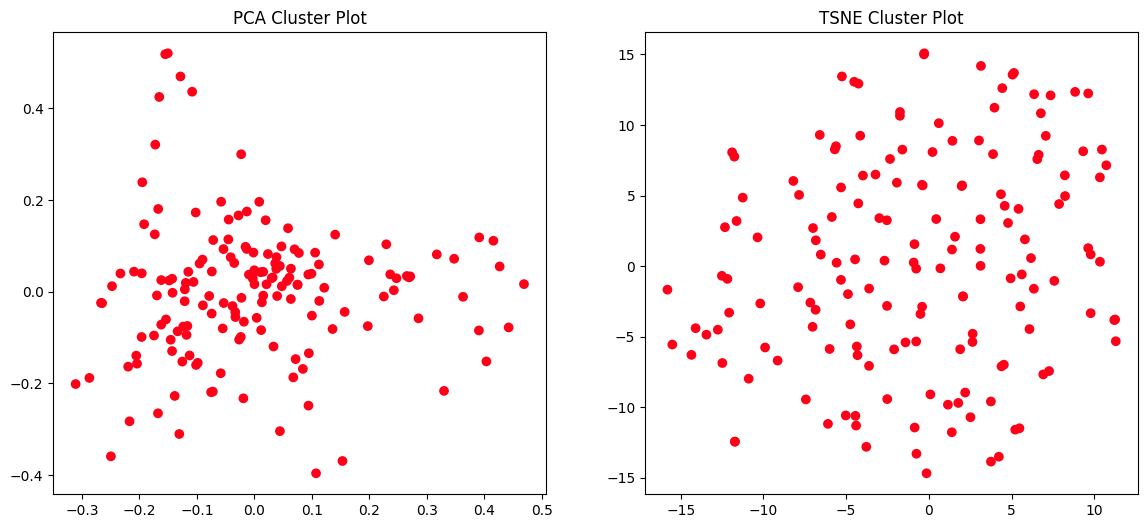

In [420]:
# plot tfidf data 2d
plot_tsne_pca_2d(tfidf_array, np.array([1]*len(tfidf_array)))

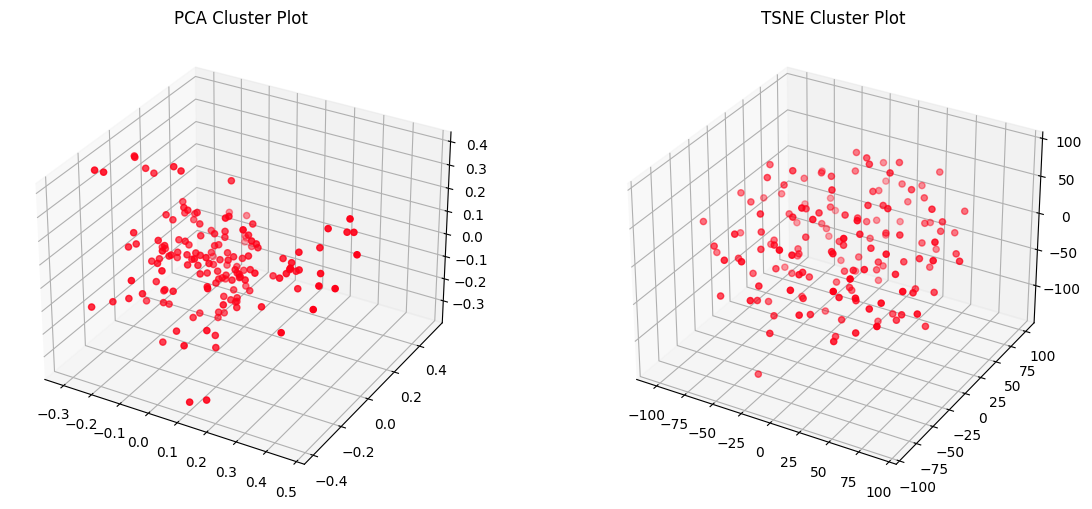

In [421]:
# plot tfidf data 3d
plot_tsne_pca_3d(tfidf_array, np.array([1]*len(tfidf_array)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters with sse 140.56612699551778
Fit 4 clusters with sse 135.90302413253409


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 6 clusters with sse 132.8330214956805
Fit 8 clusters with sse 129.40693924550968
Fit 10 clusters with sse 126.03144678118866


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 12 clusters with sse 122.47655230632282


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 14 clusters with sse 120.2490368226327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 16 clusters with sse 116.91970981966249


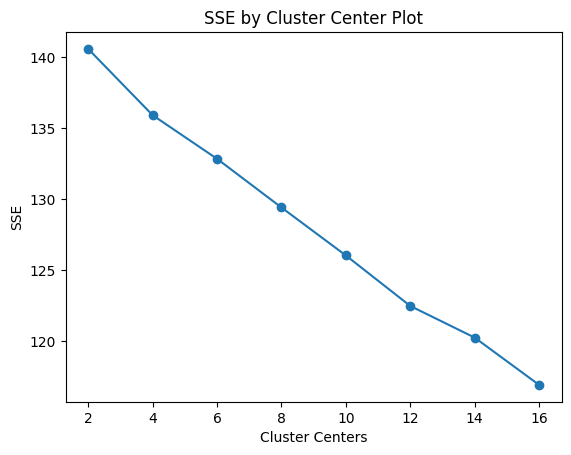

In [299]:
find_optimal_clusters(tfidf_array, 16)

In [300]:
clusters = KMeans(n_clusters=8, random_state=20).fit_predict(tfidf_array)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 3, 2, 7, 2, 0, 3, 6, 5, 1, 0, 4, 1, 1, 0, 0, 1, 5, 0, 1, 1, 1,
       1, 3, 2, 5, 2, 7, 3, 0, 1, 5, 7, 7, 0, 7, 1, 1, 2, 0, 0, 0, 0, 1,
       3, 1, 3, 1, 4, 3, 2, 0, 6, 1, 1, 3, 0, 3, 7, 1, 3, 6, 3, 2, 2, 2,
       5, 3, 1, 3, 2, 3, 3, 3, 5, 5, 0, 7, 7, 7, 7, 7, 4, 0, 7, 0, 5, 1,
       0, 5, 0, 2, 0, 5, 0, 2, 5, 2, 2, 0, 5, 6, 7, 3, 2, 0, 4, 4, 1, 1,
       0, 6, 6, 4, 4, 4, 5, 6, 1, 3, 3, 3, 1, 2, 1, 7, 7, 0, 4, 6, 5, 1,
       6, 6, 6, 6, 1, 6, 6, 7, 5, 6, 6, 3, 5, 5, 6, 6, 2, 2, 5, 2, 5, 2,
       5, 4, 4], dtype=int32)

In [303]:
get_top_keywords(tfidf_array, clusters, tfidf.get_feature_names_out(), 3)


Cluster 0
مقوله , الکترونیکی , یادگیری

Cluster 1
پژوهش , دانش , الگو

Cluster 2
دانشجو , دانشگاه , چالش

Cluster 3
سیاست , عالی , آموزش

Cluster 4
دانشآموزان , طرح , مسئله

Cluster 5
ایران , درس , برنامه

Cluster 6
گروه , آزمایش , آموزان

Cluster 7
معلمان , تربیتی , تربیت


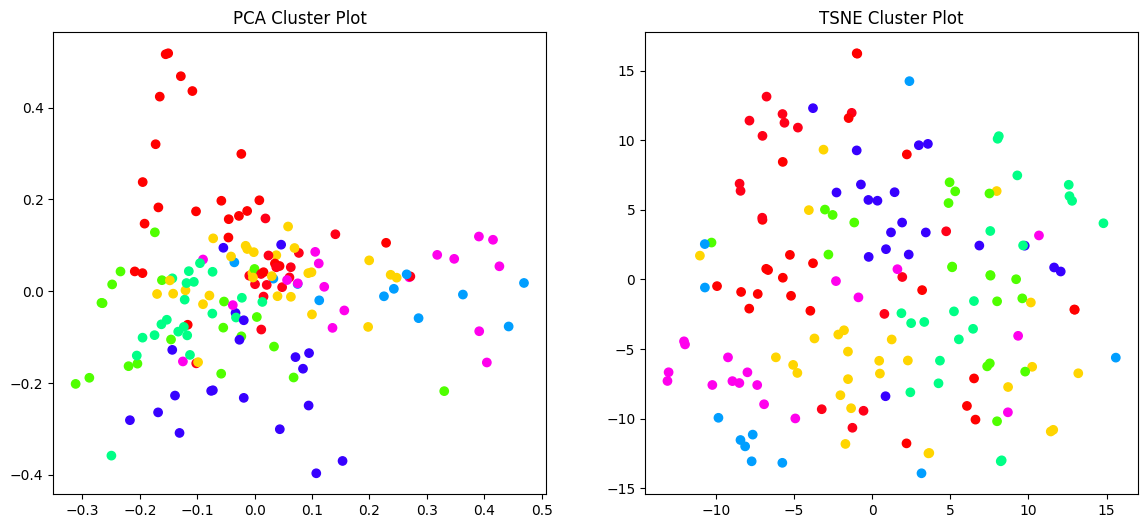

In [274]:
plot_tsne_pca_2d(tfidf_array, clusters)

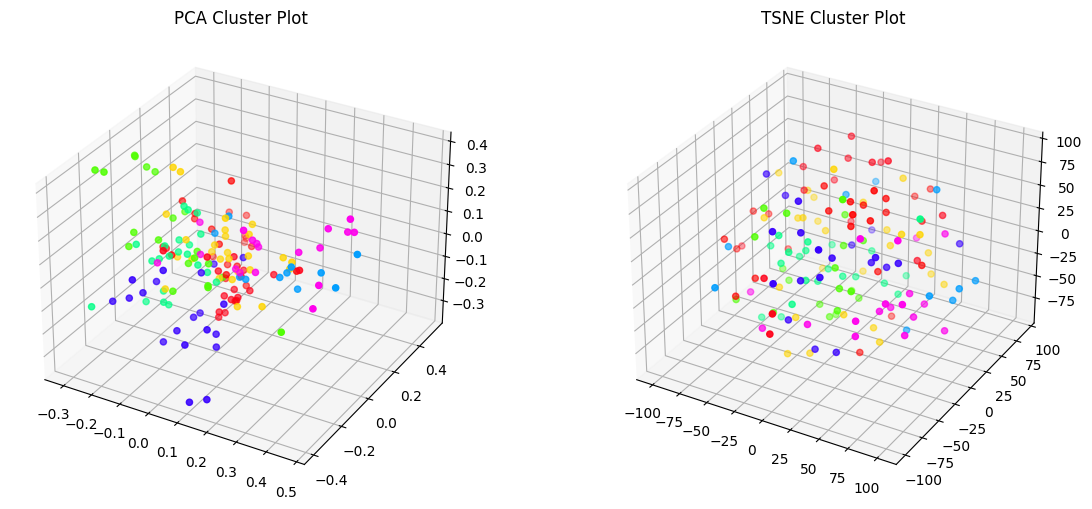

In [275]:
plot_tsne_pca_3d(tfidf_array, clusters)

In [276]:
tfidf_clustered_dataset = pd.DataFrame({'title': df['title'], 'author': df['author'], 'cluster': clusters})

In [277]:
tfidf_clustered_dataset

title        author  cluster
id                                                                           
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  فرنوش اعلامی        1
2      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی  فرنوش اعلامی        3
3    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...  فرنوش اعلامی        2
4    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  فرنوش اعلامی        7
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  فرنوش اعلامی        2
..                                                 ...           ...      ...
155  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...     زهرا گویا        5
157  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...     زهرا گویا        2
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...     زهرا گویا        5
159  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...     زهرا گویا        4
160  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...     زهرا گویا        4

[157 rows x 3 columns]

<Axes: title={'center': 'cluster'}, ylabel='Frequency'>

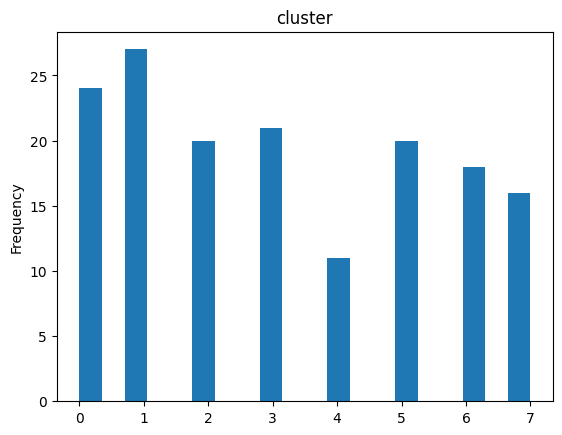

In [278]:
tfidf_clustered_dataset['cluster'].plot(kind='hist', bins=20, title='cluster')

In [279]:
tfidf_clustered_dataset[tfidf_clustered_dataset['cluster'] == 0]

title            author  \
id                                                                         
6         Lived experience of university startup teams      فرنوش اعلامی   
11   بررسی نقش تداوم یادگیری الکترونیکی بر توسعه حر...      فرنوش اعلامی   
15    دوره های الکترونیکی اثربخش سازمانی: توجه مضاع...       غلامرضا شمس   
16   شناسایی چالش ها و فرصت های توسعه سازمانی از طر...       غلامرضا شمس   
19   شناسایی موانع زیرساختی و مدیریتی به کارگیری آم...       غلامرضا شمس   
30   واکاوی اصول حاکم بر طراحی الگوی مطلوب برنامه‌د...   جمیله علم الهدی   
36   Identifying barriers to using flipped class in...   جمیله علم الهدی   
41   عوامل مؤثر بر اثربخشی یادگیری الکترونیکی: تحلی...      محمد قهرمانی   
42   شناسایی شاخص های اثرگذار در طراحی سامانه موبای...      محمد قهرمانی   
43   تعیین کنندگان اثربخشی یادگیری الکترونیکی: مطال...      محمد قهرمانی   
44   آسیب شناسی برنامه های آموزش مداوم پرستاران: یک...      محمد قهرمانی   
53   تجارب اعضای هیأت علمی از نخستین روزهای تدریس د...      محمد قهرمانی   
58   بررسی و ارائه یک الگوی تضمین کیفیت در مراکز یا...      محمد قهرمانی   
78   
فهم مساله محور قرآن مبتنی بر رویکرد سازه گرای...   رضا محمدی چابکی   
85   فهم مسأله محور قرآن مبتنی بر رویکرد سازه‌گرایی...   رضا محمدی چابکی   
87   عوامل مؤثر بر اثربخشی یادگیری الکترونیکی: تحلی...  مرتضی رضائی زاده   
90   بررسی روش های ایجاد تعامل و بهبود مشارکت دانشج...  مرتضی رضائی زاده   
92   شناسایی و مدلسازی مهم ترین چالش های بکارگیری آ...  مرتضی رضائی زاده   
94   ابزارهای ارزشیابی یادگیرندگان در محیط یادگیری ...  مرتضی رضائی زاده   
97   نقش و وظیفه معلم در محیط های دیجیتالی بر اساس ...  مرتضی رضائی زاده   
102  شناسایی و مدلسازی ویژگی‌های شخصیتی تسهیل‌کنندة...  مرتضی رضائی زاده   
108  ارزیابی جو سازمانی دانشگاه، کیفیت تجارب یادگیر...      محبوبه عارفی   
113  بررسي جريان خون مغناطيسي در طول رگ مخروطي گرفت...        نسیم اصغری   
130  تجارب اعضای هیأت علمی ‌از نخستین روزهای تدریس ...        کوروش فتحی   

     cluster  
id            
6          0  
11         0  
15         0  
16         0  
19         0  
30         0  
36         0  
41         0  
42         0  
43         0  
44         0  
53         0  
58         0  
78         0  
85         0  
87         0  
90         0  
92         0  
94         0  
97         0  
102        0  
108        0  
113        0  
130        0

In [280]:
tfidf_clustered_dataset[tfidf_clustered_dataset['cluster'] == 1]

title                 author  \
id                                                                              
1    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...           فرنوش اعلامی   
10   تحلیل عملکرد مدیریت منابع انسانی در شناسایی و ...           فرنوش اعلامی   
13   مطالعه و ارائه الگوی مفهومی و کاربردی استارت آ...           فرنوش اعلامی   
14   ساخت و اعتباریابی ابزار اندازه‌گیری سبک رهبری ...            غلامرضا شمس   
17   طراحی و تبیین الگوی صلاحیت های حرفه ای مربیگری...            غلامرضا شمس   
20   طراحی الگوهای مناسب جهت هدایت تحصیلی دانش آموز...       محمود ابوالقاسمی   
21   بررسی رابطه میان ساختار سازمانی و کارآفرینی سا...       محمود ابوالقاسمی   
22         طراحی الگوی تخصیص منابع آموزش عالی در ایران       محمود ابوالقاسمی   
23   بررسی نقش و اهمیت مدیران ارشد دانش در توسعه مد...       محمود ابوالقاسمی   
31   کالبدشکافی دانش محتوایی-تربیتی به عنوان نوعی د...        جمیله علم الهدی   
38   طراحی و اعتباریابی الگوی تربیت توحیدی در دوره ...        جمیله علم الهدی   
39   شناسایی الگوی مطلوب نظارت بر پایان نامه ها مطا...           محمد قهرمانی   
45   طراحی مدل تعالی نظام دانشگاهی با تاکید بر بنیا...           محمد قهرمانی   
47   طراحی و تبیین الگوی صلاحیت های حرفه ای مدیران ...           محمد قهرمانی   
49   عوامل سازمانی و زمینه ای توسعه حرفه ای معلمان ...           محمد قهرمانی   
55      تبیین مدل بومی مدیریت مدارس متوسطه استان کرمان           محمد قهرمانی   
56   تحلیل ساختاری اثر سبک رهبری توزیعی بر پیشرفت ت...           محمد قهرمانی   
61   بررسی رابطه ی میان ساختار سازمانی و کارآفرینی ...           محمد قهرمانی   
70   Reflection on academic activities at universit...  محمد یمنی دوزی سرخابی   
89   نیازهای نوجوانان در رابطه ی والد-فرزندی، یک مط...       مرتضی رضائی زاده   
111  ارایه الگویی برای ارتقای توانمندی معلمان دوره ...             نسیم اصغری   
112  
ارتقای تفکر تابعی: شناسایی طرح واره های پیش ن...             نسیم اصغری   
121  بررسی چارچوبهای درک شاگردان از رابطة بین نمودا...         ابراهیم ریحانی   
125  آسيب شناسي ارزشيابي كيفي-توصيفي دوره ابتدايي د...         اباصلت خراسانی   
127  رابطه بین رهبری امنیت مدار و شادکامی کارکنان م...            غلامرضا شمس   
134  طراحی و اعتباریابی الگوی آماده سازی دانشجو معل...              علی دلاور   
139  طراحی الگوی ارزش در دانش آموزان بر اساس سند تح...              علی دلاور   

     cluster  
id            
1          1  
10         1  
13         1  
14         1  
17         1  
20         1  
21         1  
22         1  
23         1  
31         1  
38         1  
39         1  
45         1  
47         1  
49         1  
55         1  
56         1  
61         1  
70         1  
89         1  
111        1  
112        1  
121        1  
125        1  
127        1  
134        1  
139        1

### tf-idf on keywords

In [304]:
keywords = tfidf.fit_transform(all_keywords)
print('feature names')
print(tfidf.get_feature_names_out(), '\n')
keywords_tfidf = keywords.toarray()
print('matrix shape')
print(keywords_tfidf.shape)

feature names
['آسیب' 'آموزان' 'آموزش' 'آموزشی' 'ابتدایی' 'اثربخشی' 'ارزشیابی' 'استاد'
 'استراتژی' 'اسلامی' 'اعضا' 'افزار' 'الکترونیکی' 'الگو' 'انسانی' 'اهداف'
 'ایران' 'برنامه' 'بسته' 'بنیاد' 'بهسازی' 'بهشتی' 'تحصیلی' 'تحقیق' 'تحلیل'
 'تدریس' 'تربیت' 'تربیتی' 'تصمیم' 'تفکر' 'توسعه' 'حرفه' 'حرفهای' 'حل'
 'خلاقیت' 'دانش' 'دانشجو' 'دانشگاه' 'دانشگاهی' 'درس' 'دوره' 'راهنما' 'رشد'
 'رهبری' 'رویکرد' 'ریاضی' 'ساختار' 'سازمانی' 'سبک' 'سیاست' 'سیستم'
 'شایستگی' 'شناختی' 'شهید' 'طراحی' 'عالی' 'علمی' 'علوم' 'عملکرد' 'عمومی'
 'عوامل' 'فلسفه' 'قابلیت' 'قرآن' 'متوسطه' 'مجازی' 'محتوا' 'مدارس' 'مدل'
 'مدیریت' 'مسئله' 'مطالعه' 'معلمان' 'معکوس' 'منابع' 'مهارت' 'نظام' 'نظریه'
 'نوآوری' 'هیأت' 'هیئت' 'پدیدارشناسی' 'پرورش' 'پژوه' 'پژوهش' 'پژوهشی'
 'پژوهید' 'پیچیدگی' 'چالش' 'کارآفرینی' 'کلاس' 'کیفی' 'کیفیت' 'گری'
 'یادگیری'] 

matrix shape
(157, 95)


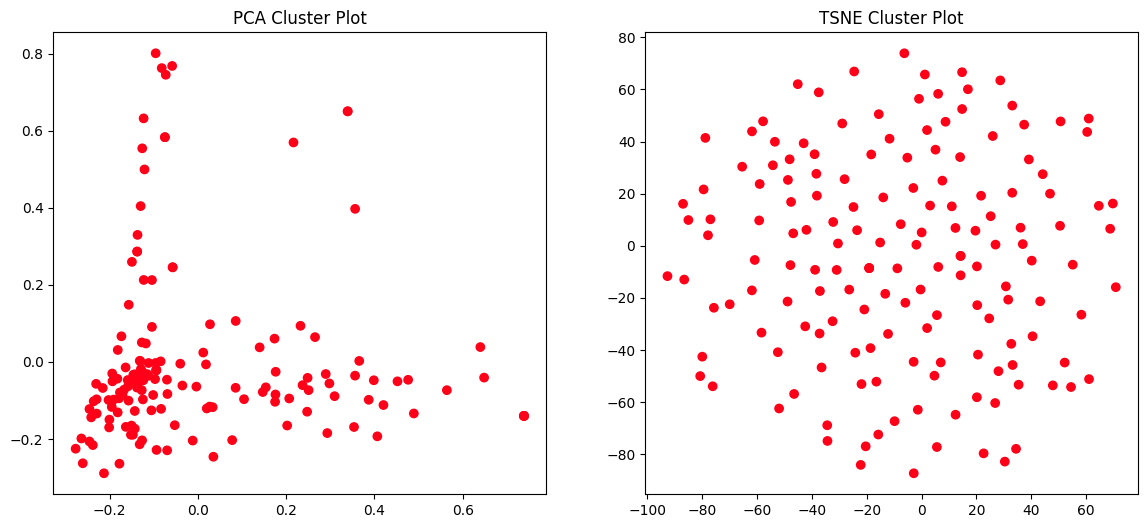

In [433]:
plot_tsne_pca_2d(keywords_tfidf, np.array([1]*len(keywords_tfidf)))

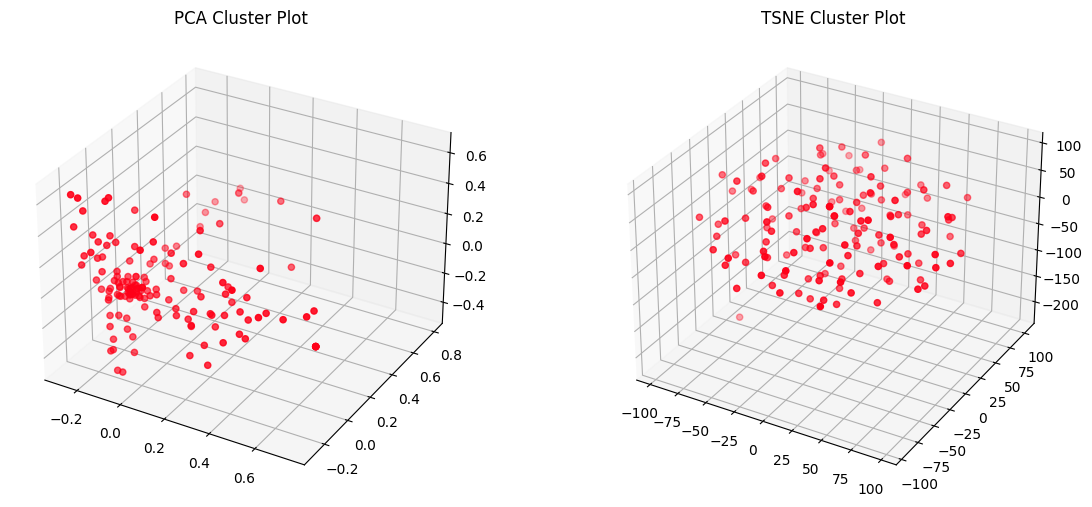

In [434]:
plot_tsne_pca_3d(keywords_tfidf, np.array([1]*len(keywords_tfidf)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters with sse 137.35745846353387
Fit 4 clusters with sse 127.7829558947978


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 6 clusters with sse 120.1928431705121
Fit 8 clusters with sse 115.11151272331098
Fit 10 clusters with sse 112.3986009531356


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 12 clusters with sse 105.78621447624916
Fit 14 clusters with sse 103.82179539862781


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 16 clusters with sse 98.23158436232183
Fit 18 clusters with sse 93.5403712361416


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 20 clusters with sse 91.76076183558831
Fit 22 clusters with sse 88.83850518832904


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 24 clusters with sse 86.42044911443736
Fit 26 clusters with sse 81.12942903471642


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 28 clusters with sse 79.81627595566212
Fit 30 clusters with sse 76.56061464959086


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 32 clusters with sse 73.92062735969682


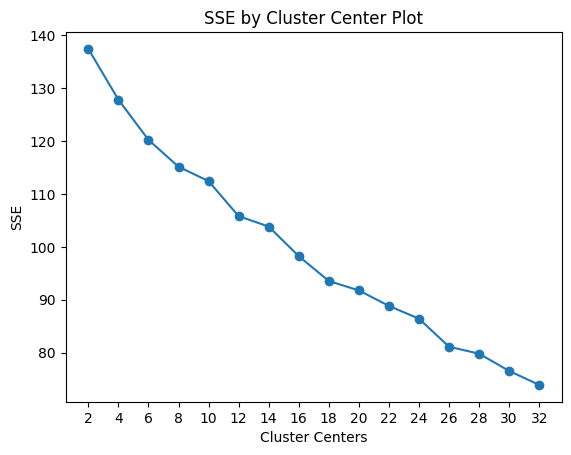

In [305]:
find_optimal_clusters(keywords_tfidf, 32)

In [307]:
clusters = KMeans(n_clusters=8, random_state=20).fit_predict(keywords_tfidf)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 0, 6, 0, 2, 2, 2, 0, 2, 4, 1, 2, 7, 0, 1, 6, 4, 7, 4, 0, 2, 0,
       2, 4, 2, 0, 0, 0, 4, 7, 0, 7, 0, 0, 4, 4, 5, 0, 6, 1, 1, 4, 4, 0,
       4, 0, 4, 7, 0, 4, 6, 6, 4, 7, 0, 4, 1, 4, 1, 2, 4, 2, 4, 1, 0, 2,
       6, 4, 2, 4, 2, 0, 4, 0, 4, 4, 5, 0, 7, 0, 7, 0, 7, 5, 7, 1, 2, 0,
       1, 6, 6, 4, 1, 4, 1, 4, 1, 4, 0, 1, 1, 0, 7, 4, 2, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 0, 4, 0, 4, 4, 0, 7, 7, 4, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 1, 1, 3, 3, 0, 0, 6, 7, 0, 0, 3, 3, 4, 3, 3, 3,
       3, 0, 3], dtype=int32)

In [309]:
get_top_keywords(keywords_tfidf, clusters, tfidf.get_feature_names_out(), 4)


Cluster 0
دانشجو , تحصیلی , تربیتی , آموزشی

Cluster 1
معکوس , حرفه , الکترونیکی , یادگیری

Cluster 2
سازمانی , بهشتی , شهید , دانشگاه

Cluster 3
محتوا , برنامه , درس , ریاضی

Cluster 4
انسانی , برنامه , عالی , آموزش

Cluster 5
دوره , تربیت , الگو , قرآن

Cluster 6
هیأت , چالش , علمی , اعضا

Cluster 7
برنامه , درس , تربیت , مدارس


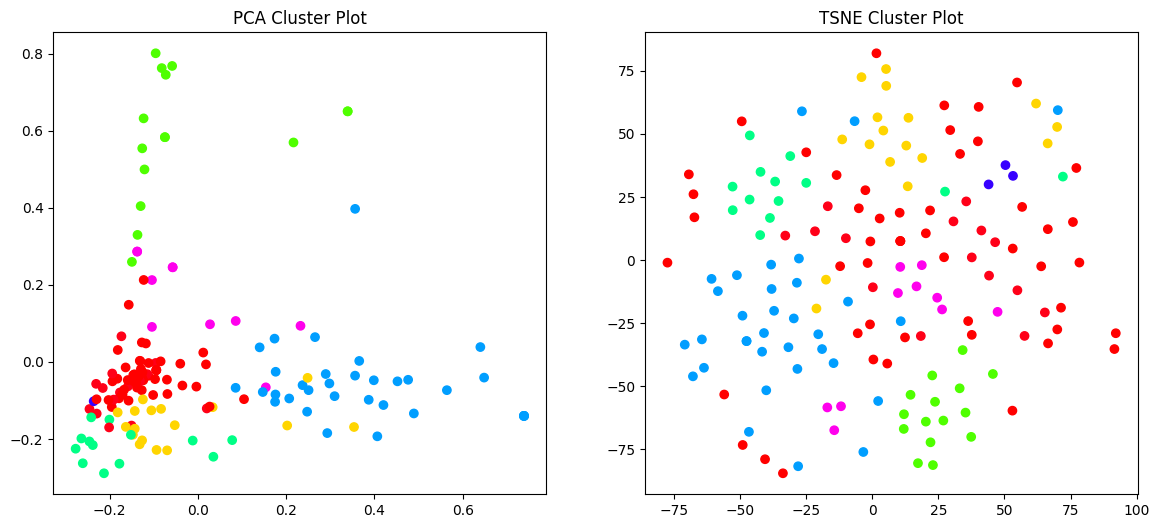

In [310]:
plot_tsne_pca_2d(keywords_tfidf, clusters)

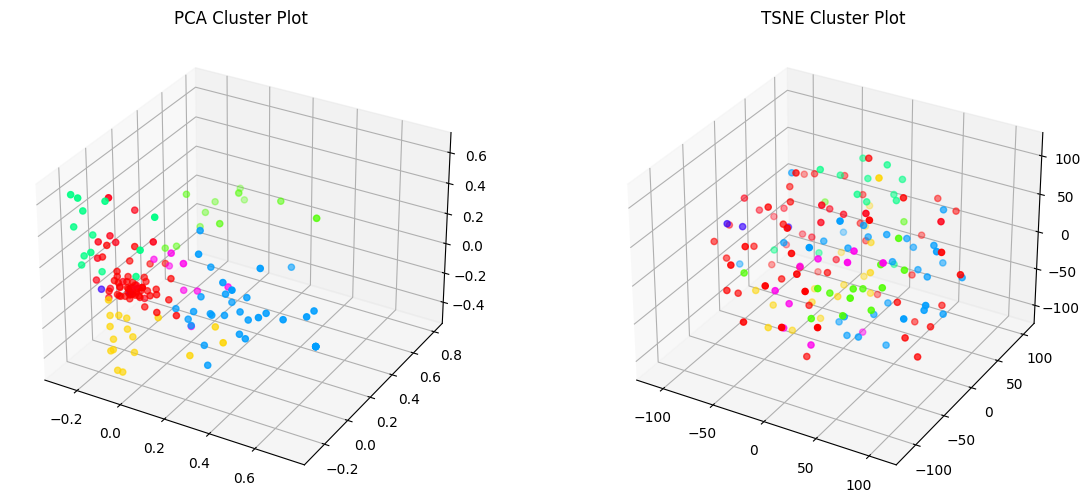

In [311]:
plot_tsne_pca_3d(keywords_tfidf, clusters)

### 8. Word to Vec

In [312]:
model = Word2Vec(all_vocabs, min_count=1)

w2v = dict(zip(model.wv.index_to_key , model.wv.vectors))
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [313]:
modelw = MeanEmbeddingVectorizer(w2v)
vectors_w2v = modelw.transform(all_vocabs)

In [314]:
vectors_w2v

array([[-0.06711012,  0.30553278,  0.02648947, ..., -0.0804512 ,
         0.1170992 ,  0.33869454],
       [-0.06660101,  0.30825028,  0.02578246, ..., -0.06195681,
         0.10181718,  0.3415828 ],
       [-0.07245539,  0.29907507,  0.03679002, ..., -0.07548181,
         0.10478223,  0.3332685 ],
       ...,
       [-0.07023371,  0.2983635 ,  0.03394651, ..., -0.06676195,
         0.09756048,  0.3433287 ],
       [-0.06968673,  0.2966891 ,  0.03568334, ..., -0.06625034,
         0.09812945,  0.33238366],
       [-0.06532937,  0.3057228 ,  0.02577461, ..., -0.06652152,
         0.10761715,  0.3400929 ]], dtype=float32)

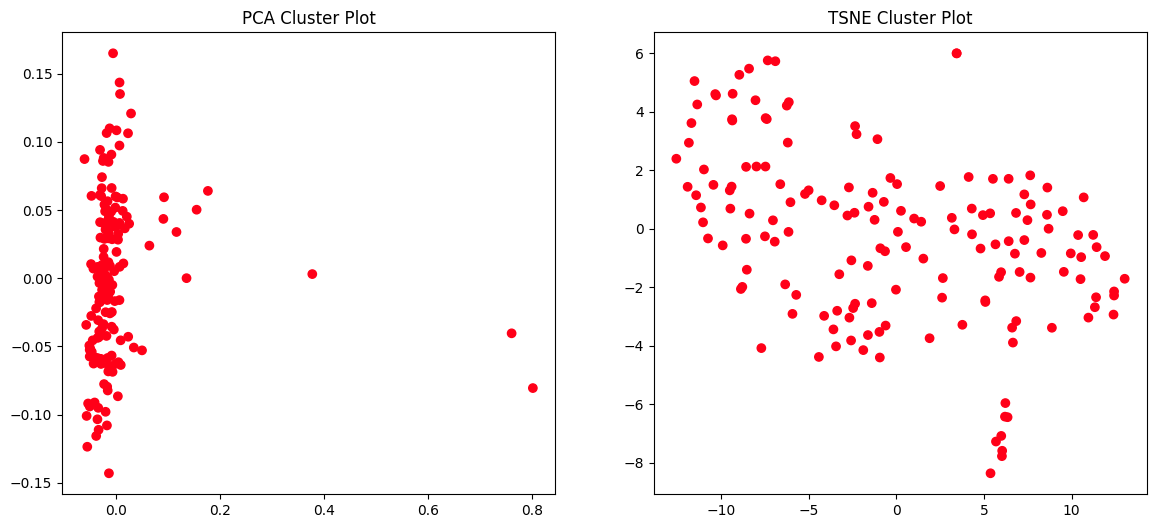

In [435]:
plot_tsne_pca_2d(vectors_w2v, np.array([1]*len(vectors_w2v)))

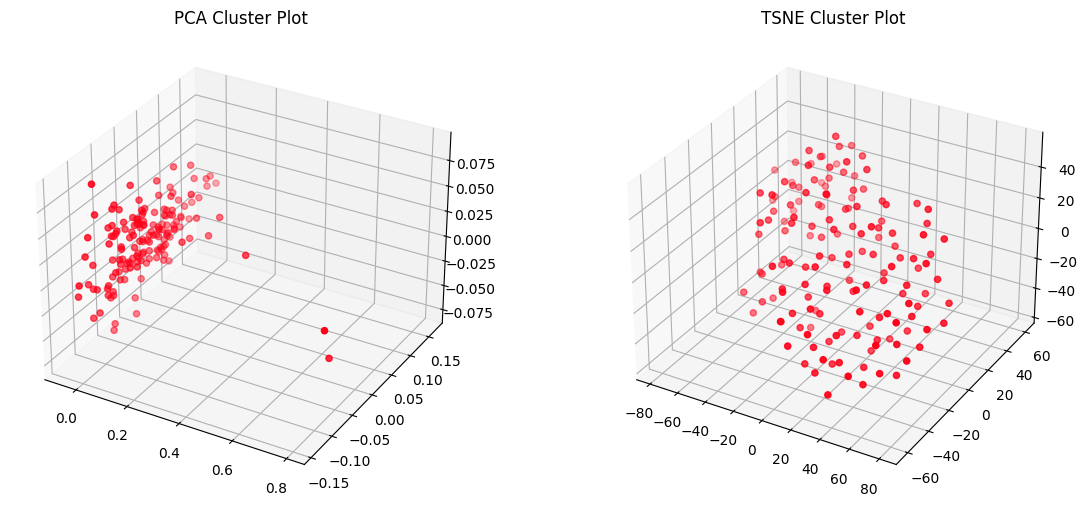

In [436]:
plot_tsne_pca_3d(vectors_w2v, np.array([1]*len(vectors_w2v)))

In [315]:
vectors_w2v.shape

(157, 100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters with sse 1.0937247276306152
Fit 4 clusters with sse 0.5063046813011169


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 6 clusters with sse 0.3613882064819336


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 8 clusters with sse 0.2719213664531708
Fit 10 clusters with sse 0.23126158118247986


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 12 clusters with sse 0.20576977729797363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 14 clusters with sse 0.1850038468837738


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 16 clusters with sse 0.16997544467449188


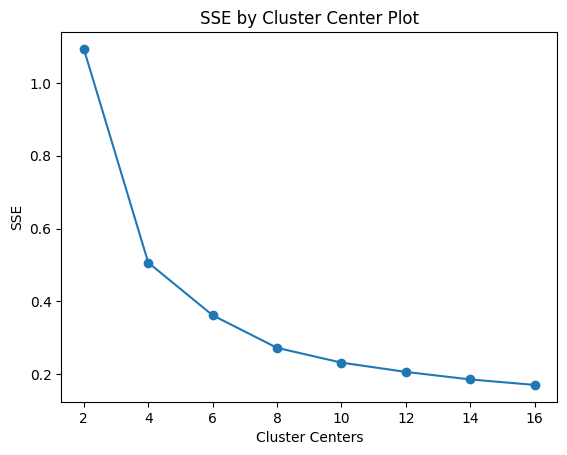

In [316]:
find_optimal_clusters(vectors_w2v, 16)

In [323]:
clusters = KMeans(n_clusters=6, random_state=20).fit_predict(vectors_w2v)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 0, 0, 1, 0, 4, 0, 0, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4,
       0, 0, 0, 3, 0, 3, 4, 3, 4, 3, 3, 4, 2, 4, 4, 4, 0, 0, 4, 4, 0, 4,
       0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 3, 4, 0, 3, 0, 0, 4, 3, 4, 3, 4,
       0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 0, 0, 4, 3, 0, 4, 4,
       4, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 2, 4, 4,
       2, 0, 1, 2, 2, 2, 4, 0, 3, 5, 4, 0, 2, 4, 4, 4, 0, 4, 0, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 0,
       3, 4, 4], dtype=int32)

In [ ]:
# get_top_keywords(vectors_w2v, clusters, tfidf.get_feature_names_out(), 10)

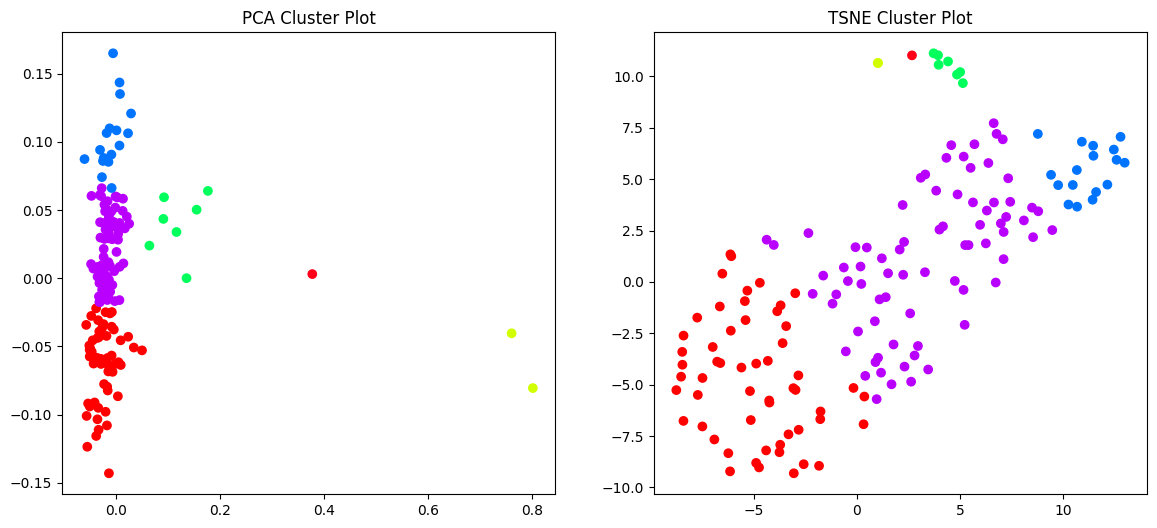

In [324]:
plot_tsne_pca_2d(vectors_w2v, clusters)

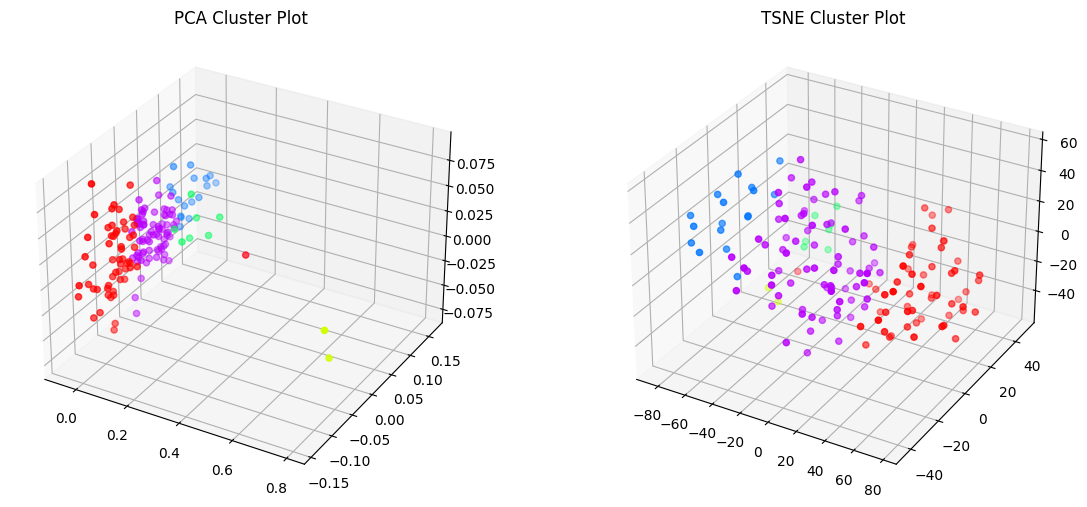

In [325]:
plot_tsne_pca_3d(vectors_w2v, clusters)

In [326]:
w2v_clustered_dataset = pd.DataFrame({'title': df['title'], 'author': df['author'], 'cluster': clusters})

<Axes: title={'center': 'cluster'}, ylabel='Frequency'>

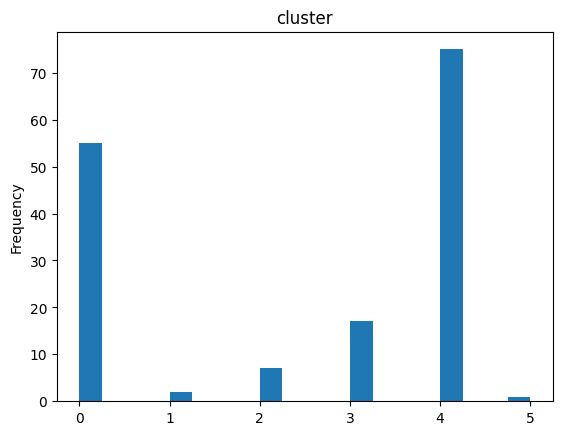

In [327]:
w2v_clustered_dataset['cluster'].plot(kind='hist', bins=20, title='cluster')

In [331]:
w2v_clustered_dataset[w2v_clustered_dataset['cluster'] == 3]

title                 author  \
id                                                                              
26   ضرورت تحول در روش شناسی نظریه های انقلاب با تأ...        جمیله علم الهدی   
28                       مناسبات تربیتی خانواده و دولت        جمیله علم الهدی   
30   واکاوی اصول حاکم بر طراحی الگوی مطلوب برنامه‌د...        جمیله علم الهدی   
32   مبانی نظری تلفیق برنامه درسی بر اساس حکمت متعا...        جمیله علم الهدی   
33             چرخش از عالم دو قطبی به جهان سه درجه ای        جمیله علم الهدی   
57       تدوین الگوی مدیریت استراتژیک آموزش عالی ایران           محمد قهرمانی   
60   مدل ادراک و نگرش معلمان نسبت به توسعه حرفه ای ...           محمد قهرمانی   
64   An Analytical Study of Aspects and Components ...  محمد یمنی دوزی سرخابی   
66   Students Satisfaction of Thesis Conducting Pro...  محمد یمنی دوزی سرخابی   
74   Functional pathology of autonomous campuses of...  محمد یمنی دوزی سرخابی   
79   مطالعه تطبیقی استعاره تربیتی سفر در عرفان اسلا...        رضا محمدی چابکی   
80               
گذار از نظریه به عمل در تربیت اسلامی        رضا محمدی چابکی   
82   تبیین جایگاه زبان در تقویت مبانی، تصریح اهداف ...        رضا محمدی چابکی   
86                 تاریخ فلسفه تعلیم و تربیت در ایران         رضا محمدی چابکی   
121  بررسی چارچوبهای درک شاگردان از رابطة بین نمودا...         ابراهیم ریحانی   
143  تاملی در مولفه های برنامه درسی ریاضی مدرسه ای ...          علیرضا کیامنش   
158  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...              زهرا گویا   

     cluster  
id            
26         3  
28         3  
30         3  
32         3  
33         3  
57         3  
60         3  
64         3  
66         3  
74         3  
79         3  
80         3  
82         3  
86         3  
121        3  
143        3  
158        3

In [333]:
w2v_clustered_dataset[w2v_clustered_dataset['cluster'] == 1]

title          author  \
id                                                                       
5    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...    فرنوش اعلامی   
115  مقايسه تأثير روش هاي مختلف ارزشيابي توصيفي بر ...   محمدرضا سرمدي   

     cluster  
id            
5          1  
115        1

## Word To Vec with keywords

In [385]:
model = Word2Vec(all_keywords, min_count=1)
w2v = dict(zip(model.wv.index_to_key , model.wv.vectors))

modelw = MeanEmbeddingVectorizer(w2v)
keywords_w2v = modelw.transform(all_keywords)

keywords_w2v.shape

(157, 100)

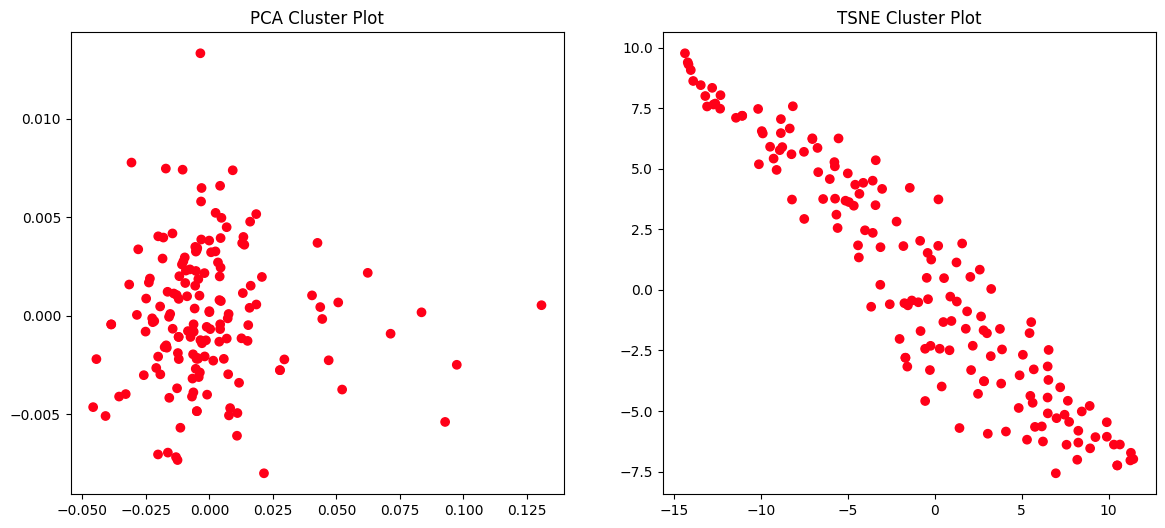

In [437]:
plot_tsne_pca_2d(keywords_w2v, np.array([1]*len(keywords_w2v)))

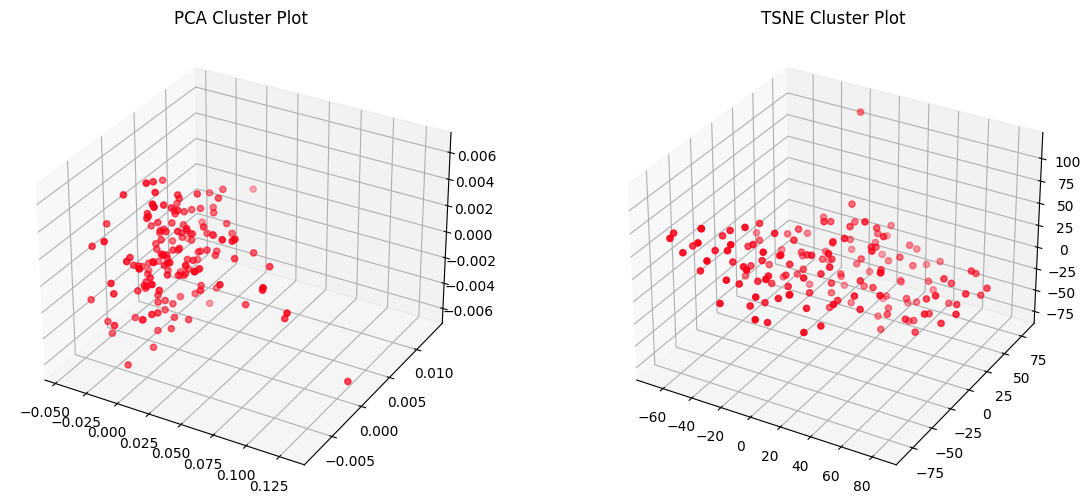

In [438]:
plot_tsne_pca_3d(keywords_w2v, np.array([1]*len(keywords_w2v)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters with sse 0.048824142664670944
Fit 4 clusters with sse 0.022420726716518402
Fit 6 clusters with sse 0.014560464769601822
Fit 8 clusters with sse 0.011664001271128654


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 10 clusters with sse 0.01040553953498602


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 12 clusters with sse 0.009574088267982006


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 14 clusters with sse 0.008937465026974678


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 16 clusters with sse 0.008444633334875107
Fit 18 clusters with sse 0.007969014346599579


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 20 clusters with sse 0.0077748666517436504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 22 clusters with sse 0.007434622850269079


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 24 clusters with sse 0.007135582622140646


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 26 clusters with sse 0.0068613020703196526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 28 clusters with sse 0.0065741161815822124


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 30 clusters with sse 0.006242499221116304


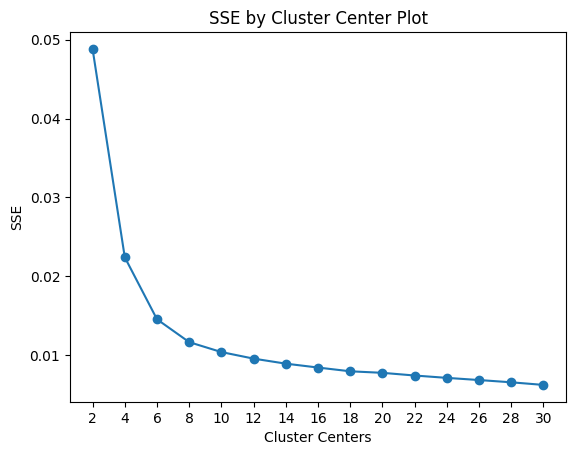

In [386]:
find_optimal_clusters(keywords_w2v, 30)

In [387]:
clusters = KMeans(n_clusters=8, random_state=20).fit_predict(keywords_w2v)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 7, 7, 6, 7, 7, 5, 0, 6, 6, 7, 6, 2, 5, 2, 7, 2, 7, 6, 2, 6, 2,
       6, 7, 0, 7, 7, 2, 6, 5, 0, 6, 7, 7, 0, 6, 7, 5, 7, 7, 7, 6, 6, 6,
       7, 2, 7, 5, 6, 7, 3, 1, 5, 7, 7, 6, 7, 2, 5, 6, 6, 7, 5, 7, 6, 5,
       6, 7, 7, 6, 6, 5, 6, 2, 5, 6, 2, 5, 7, 6, 5, 5, 7, 2, 0, 7, 7, 7,
       0, 6, 0, 5, 5, 5, 5, 2, 6, 2, 6, 7, 6, 3, 5, 0, 0, 5, 2, 2, 1, 4,
       3, 5, 6, 1, 5, 2, 5, 3, 6, 1, 0, 5, 6, 6, 6, 2, 7, 1, 5, 1, 7, 7,
       2, 6, 1, 6, 0, 7, 5, 7, 7, 7, 6, 7, 2, 6, 1, 7, 7, 7, 6, 5, 5, 2,
       6, 7, 7], dtype=int32)

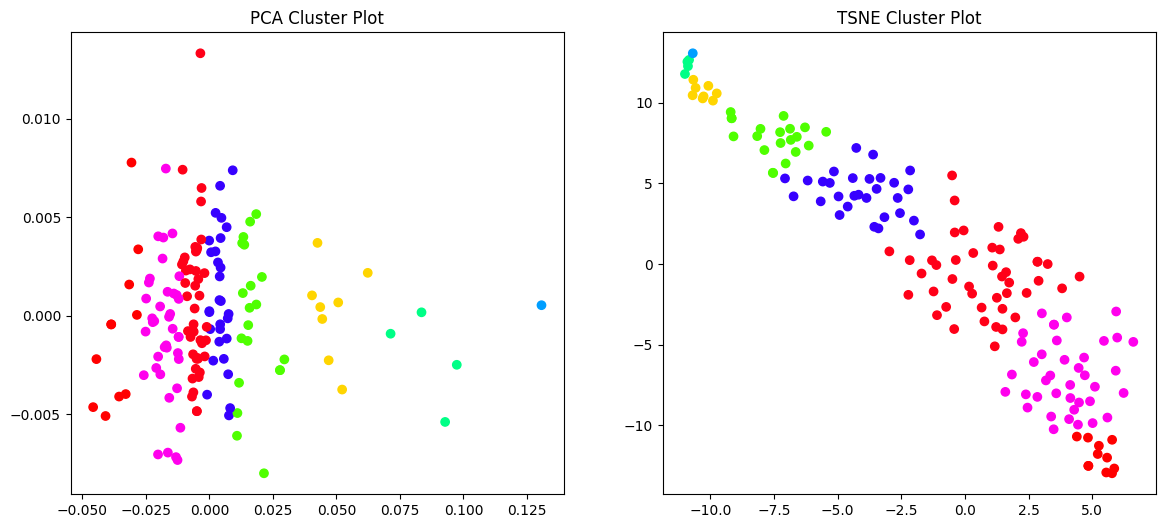

In [388]:
plot_tsne_pca_2d(keywords_w2v, clusters)

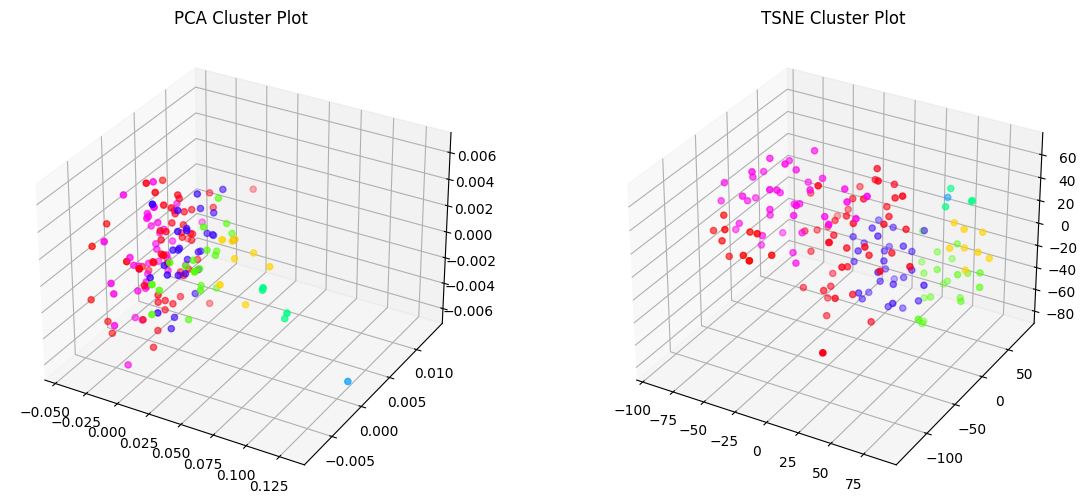

In [389]:
plot_tsne_pca_3d(keywords_w2v, clusters)

In [390]:
keywords_w2v_df = pd.DataFrame({'title': token_df['title'], 'author': token_df['author'], 'keywords': token_df['keywords'], 'cluster': clusters})

In [392]:
keywords_w2v_df

title        author  \
0    ارزیابی میزان آمادگی مدارس ابتدایی شهر تهران ب...  فرنوش اعلامی   
1      بررسی تحولات رشته مدیریت آموزشی: یک مطالعه کیفی  فرنوش اعلامی   
2    بررسی چالش های آموزشی ، پژوهشی و سازمانیِ اعضا...  فرنوش اعلامی   
3    توسعه زیست بوم کارآفرینی دانشجویی با رویکرد آز...  فرنوش اعلامی   
4    تحلیل عوامل دلبستگی شغلی کارکنان دانشگاه شهید ...  فرنوش اعلامی   
..                                                 ...           ...   
152  تجربه زیسته یک متخصص برنامه درسی ریاضی در تلفی...     زهرا گویا   
153  چالش های اجرای ارزشیابی توصیفی درس ریاضی در دو...     زهرا گویا   
154  ارتقای سواد مالی و تصمیم گیری مالی از طریق برن...     زهرا گویا   
155  تاثیر استفاده از راهبرد رسم شکل در حل مسایل کل...     زهرا گویا   
156  ضرورت تدوین معیارهای روبریک کیفی برای اجرای مو...     زهرا گویا   

                                              keywords  cluster  
0            ارزیابی، مدارس ابتدایی، مدیریت مدرسه محور        5  
1    تحولات رشته مدیریت آموزشی نقاط قوت و ضعف فرصت ...        7  
2    چالش­های آموزشی  چالش‌های پژوهشی  چالش‌های ساز...        7  
3    زیست بوم کارآفرینی کارآفرینی دانشجویی استارتاپ...        6  
4    دلبستگی کارکنان  وفاداری سازمانی  دانشگاه شهید...        7  
..                                                 ...      ...  
152  برنامه درسی ریاضی ، سیاست ، ایدئولوژی ، تغییرا...        5  
153             ارزشیابی توصیفی ، ریاضی ، دوره ابتدائی        2  
154  سواد مالی ، تصمیم گیری مالی ، ابزار مالی ، برن...        6  
155  رسم شکل ، راهبرد حل مسئله ، شکل های شبکه ای ، ...        7  
156  طرح ارزشیابی توصیفی ، روبریک کیفی ، معلمان دور...        7  

[157 rows x 4 columns]

In [393]:
def show_clustering_result(titles, clusters):
  clustered_docs = [[] for i in range(max(clusters)+1)]
  for i in range(len(titles)):
    clustered_docs[clusters[i]].append(titles[i])


  for i in range(len(clustered_docs)):
    print(f'Cluster: {i}')
    for title in clustered_docs[i]:
      print(title)
    print()

In [394]:
show_clustering_result(token_df['title'], clusters)

Cluster: 0
The effect of technology-based entrepreneurship education on empowering the entrepreneurial spirit of elementary students (Case study: sixth graders)
بررسی چالش‌های آموزش عالی بین‌المللی در دانشگاه شهید بهشتی
کالبدشکافی دانش محتوایی-تربیتی به عنوان نوعی دانش میان‌رشته‌‌ای برای تدریس دانشگاهی
Identifying barriers to using flipped class in Iranian higher education
تاریخ فلسفه تعلیم و تربیت در ایران 
بررسی روش های ایجاد تعامل و بهبود مشارکت دانشجویان در فرایند یادگیری در آموزش عالی: یک مرور نظام مند
شناسایی و مدلسازی مهم ترین چالش های بکارگیری آموزش الکترونیکی با رویکرد مدل سازی ساختاری تفسیری در شرکت ملی گاز ایران
The challenges of post-COVID age in Iranian higher education
        بررسی چالشهای آموزش عالی بین‌المللی در دانشگاه شهید بهشتی
شناسایی عوامل موثر بر انتقال آموزش به محیط کار در دانشگاه هوایی شهید ستاری
طراحی الگوی ارزش در دانش آموزان بر اساس سند تحول بنیادین آموزش و پرورش

Cluster: 1
تجارب اعضای هیأت علمی از نخستین روزهای تدریس در دانشگاه: یک مطالعه کیفی
ارایه الگویی

### Vectoring Using Transfomer - ParseBert

In [335]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences

In [336]:
tokenizer = BertTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

bert_array = []
for text in token_df['text']:
    tokens = tokenizer.encode_plus(
                                    text,
                                    max_length=250,
                                    truncation=True,
                                    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
                                    return_token_type_ids=True,
                                    return_attention_mask=True,
                                    padding='max_length',
                                    return_tensors='pt',  # Return PyTorch tensors
                                    )

    bert_array.append(list(tokens['input_ids'].flatten()))

bert_array = np.array(bert_array)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

In [337]:
bert_array

array([[   2, 4335, 2777, ...,    0,    0,    0],
       [   2, 2712, 5586, ...,    0,    0,    0],
       [   2, 2712, 5355, ..., 2297, 2036,    4],
       ...,
       [   2, 5430, 9455, ..., 2554,  300,    4],
       [   2, 3014, 2383, ...,    0,    0,    0],
       [   2, 4955, 4908, ...,    0,    0,    0]])

In [339]:
bert_array.shape

(157, 250)

In [340]:
pca2 = PCA(n_components=20).fit_transform(bert_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters with sse 3453933832651.0547
Fit 4 clusters with sse 3351957040269.6357
Fit 6 clusters with sse 3259590945285.508


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 8 clusters with sse 3129230198681.0815
Fit 10 clusters with sse 3005083920269.0127


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 12 clusters with sse 2961666602394.7334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 14 clusters with sse 2823553389689.1143


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 16 clusters with sse 2792212162222.151


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 18 clusters with sse 2638664919361.2085


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 20 clusters with sse 2568309294943.832


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 22 clusters with sse 2478496292206.2793


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 24 clusters with sse 2415105409460.5117


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 26 clusters with sse 2308916294130.452


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 28 clusters with sse 2253724501698.245


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 30 clusters with sse 2153982721616.17


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 32 clusters with sse 2073608095842.217


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 34 clusters with sse 2014341812256.917


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 36 clusters with sse 1933162284910.5146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 38 clusters with sse 1883136319909.0042


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 40 clusters with sse 1797491534309.915


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 42 clusters with sse 1743477736369.2334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 44 clusters with sse 1690125251732.1199


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 46 clusters with sse 1589690493974.8853


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 48 clusters with sse 1547758067202.3496


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 50 clusters with sse 1489027151167.462


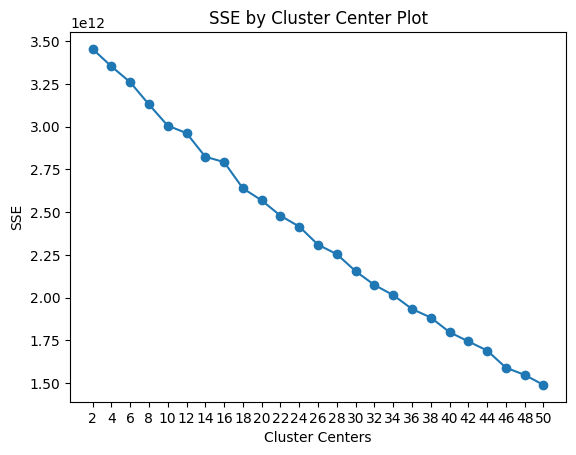

In [341]:
find_optimal_clusters(bert_array, 50)

In [342]:
clusters = KMeans(n_clusters=8, random_state=20).fit_predict(bert_array)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 5, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 7, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

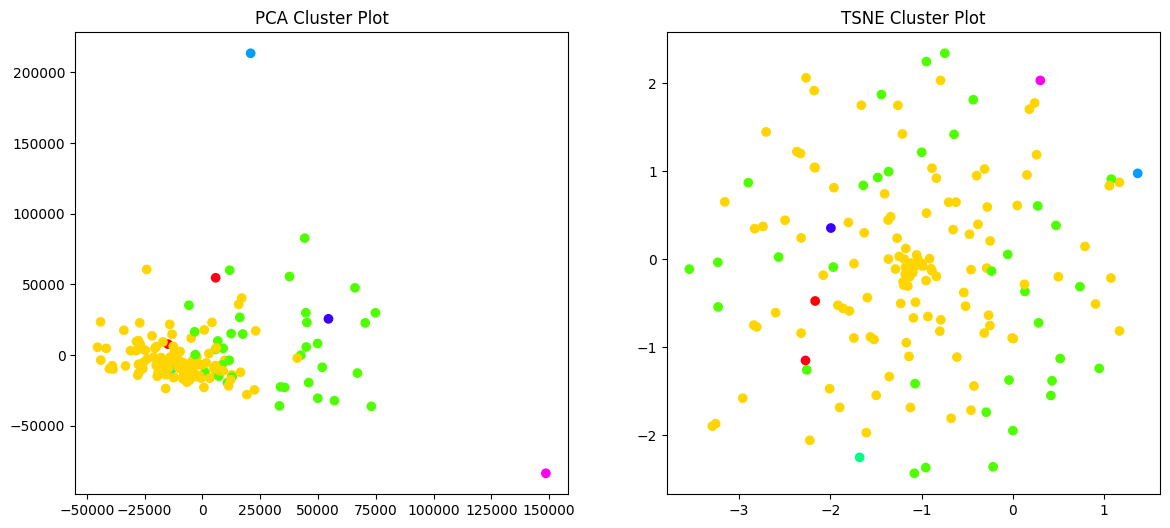

In [343]:
plot_tsne_pca_2d(bert_array, clusters)

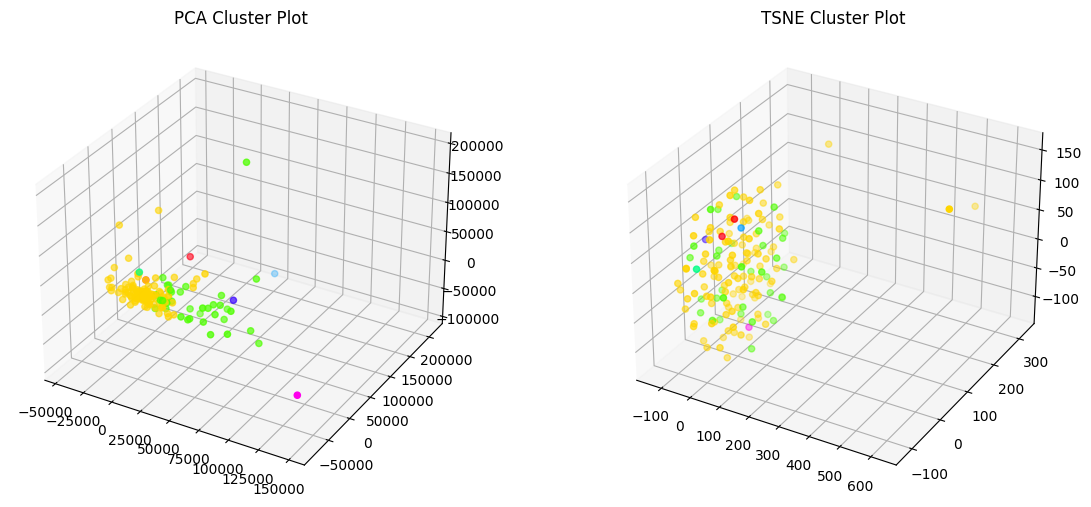

In [344]:
plot_tsne_pca_3d(bert_array, clusters)

## Clustering Using AgglomerativeClustering

#### using vectors_w2v



In [397]:
clustering = AgglomerativeClustering(n_clusters=6).fit(vectors_w2v)

clusters = clustering.labels_

clusters

array([0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 4, 0, 4, 1, 4, 1, 4, 4, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 4, 1, 0, 4, 0, 0, 1, 4, 1, 4, 1,
       0, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 0, 0, 1, 4, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1,
       2, 0, 3, 2, 2, 2, 1, 0, 4, 5, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1])

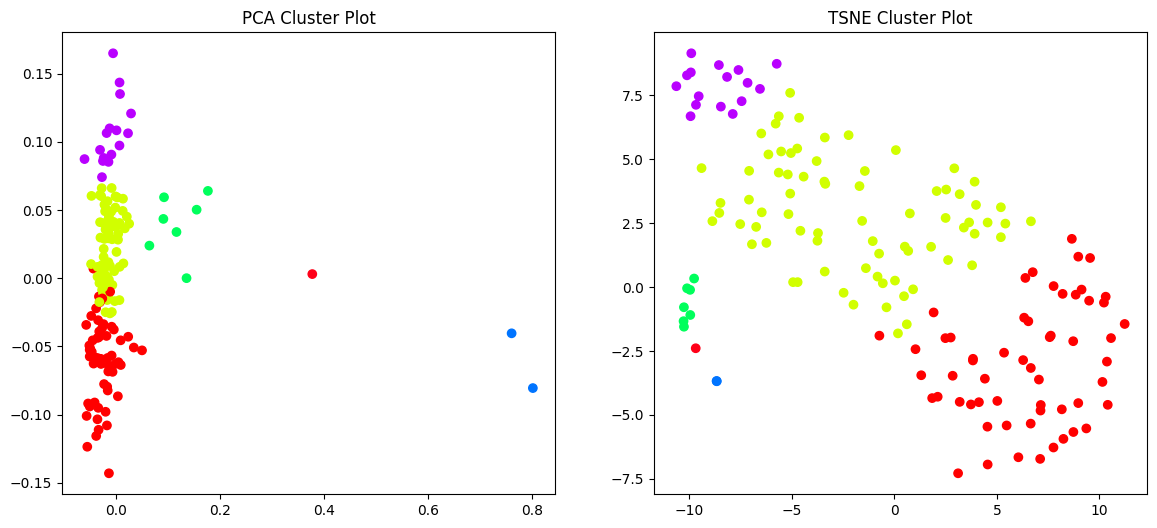

In [398]:
plot_tsne_pca_2d(vectors_w2v, clusters)

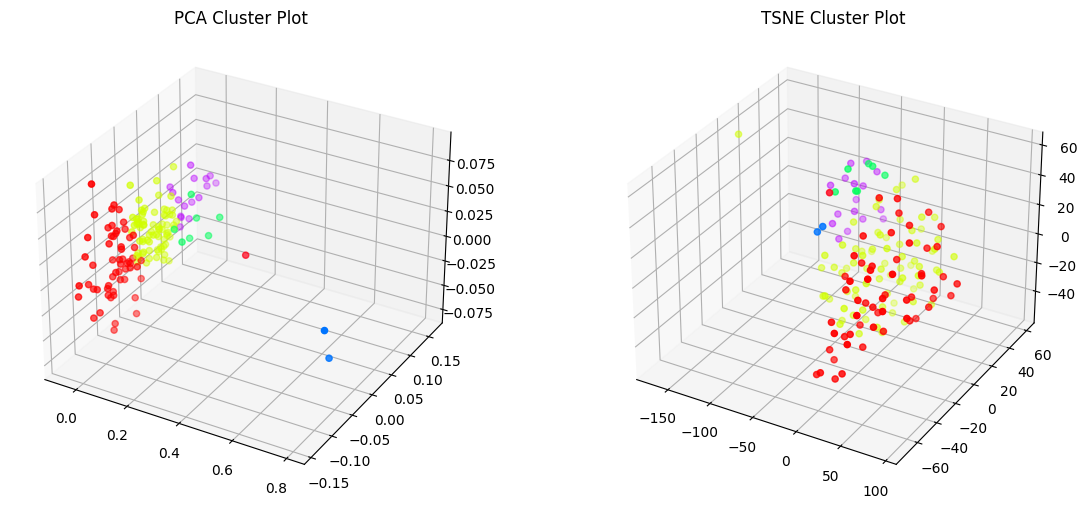

In [399]:
plot_tsne_pca_3d(vectors_w2v, clusters)

#### using keywords w2v


In [409]:
clustering = AgglomerativeClustering(n_clusters=8).fit(keywords_w2v)

clusters = clustering.labels_

clusters

array([6, 4, 4, 2, 4, 4, 0, 5, 2, 2, 4, 4, 0, 6, 0, 4, 0, 4, 2, 0, 4, 0,
       2, 4, 5, 4, 4, 0, 2, 6, 2, 4, 4, 4, 5, 2, 4, 6, 4, 4, 4, 2, 2, 2,
       4, 0, 4, 6, 2, 4, 3, 1, 0, 6, 4, 2, 4, 0, 6, 4, 5, 4, 6, 4, 4, 0,
       2, 4, 4, 2, 4, 6, 2, 0, 6, 2, 0, 4, 6, 2, 6, 0, 4, 0, 5, 4, 4, 4,
       5, 2, 5, 4, 6, 4, 0, 0, 2, 0, 2, 4, 2, 3, 0, 5, 5, 6, 0, 0, 1, 7,
       1, 0, 2, 1, 4, 0, 6, 3, 2, 1, 5, 4, 2, 2, 2, 0, 4, 1, 0, 1, 4, 4,
       0, 2, 1, 2, 5, 4, 6, 4, 4, 4, 4, 4, 0, 4, 1, 4, 4, 4, 2, 6, 6, 0,
       2, 4, 4])

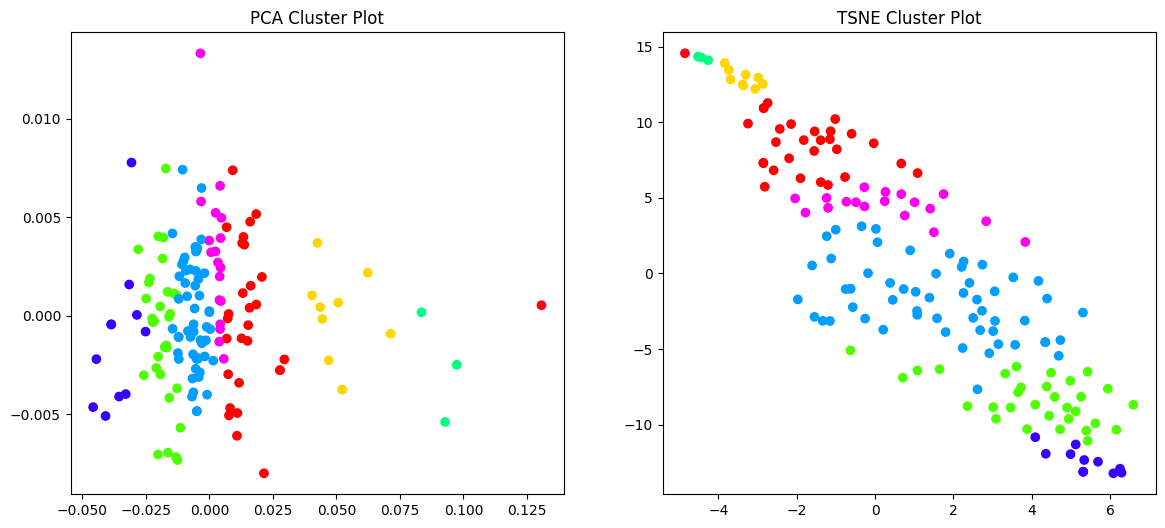

In [410]:
plot_tsne_pca_2d(keywords_w2v, clusters)

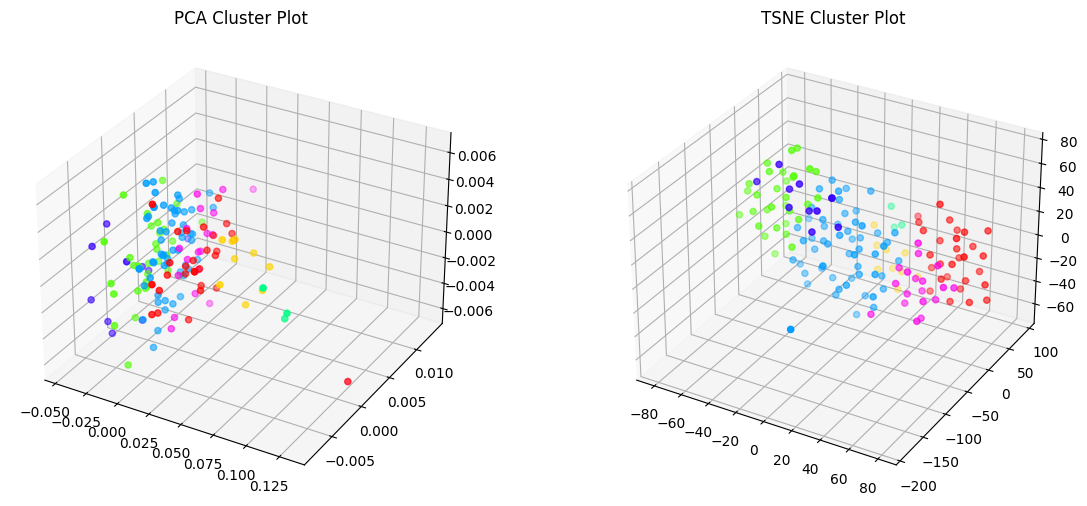

In [411]:
plot_tsne_pca_3d(keywords_w2v, clusters)

In [412]:
show_clustering_result(token_df['title'], clusters)

Cluster: 0
شناسایی ابعاد و مؤلفه های کلیدی اشتغال پذیری دانش آموختگان کارشناسیِ دوره های علوم رفتاری دانشگاه
مطالعه و ارائه الگوی مفهومی و کاربردی استارت آپ های دانش آموزی در برنامه درسی دوره دوم متوسطه
 دوره های الکترونیکی اثربخش سازمانی: توجه مضاعف به محتوا
طراحی و تبیین الگوی صلاحیت های حرفه ای مربیگری اجرایی برای آموزش و توسعه مدیران و رهبران سازمان ها
طراحی الگوهای مناسب جهت هدایت تحصیلی دانش آموزان دوره متوسطه
طراحی الگوی تخصیص منابع آموزش عالی در ایران
مناسبات تربیتی خانواده و دولت
طراحی و تبیین الگوی صلاحیت های حرفه ای مدیران مراکز پیش دبستان
بررسی نظام آموزش و توسعه کارکنان در سازمان های ایرانی (مطالعه وضعیت موجود) 
چالش های برون سپاری آموزش به مؤسسات ارائه دهنده آموزش از دیدگاه مدیران و کارشناسان آموزش
An analysis of merging effects on academic culture
Doctoral Supervision Stylistics

فهم مساله محور قرآن مبتنی بر رویکرد سازه گرایی واقع گرایانه
تغییر نقش معلم مبتنی بر نظریه پیچیدگی: از بازنمایی به تسهیل نوپدیدی
فهم مسأله محور قرآن مبتنی بر رویکرد سازه‌گرایی واقع‌گرایانه
نقش و 

## Clustering using DBSCAN

In [441]:
from sklearn.cluster import DBSCAN

#### find MinPts

Text(0, 0.5, 'epsilon')

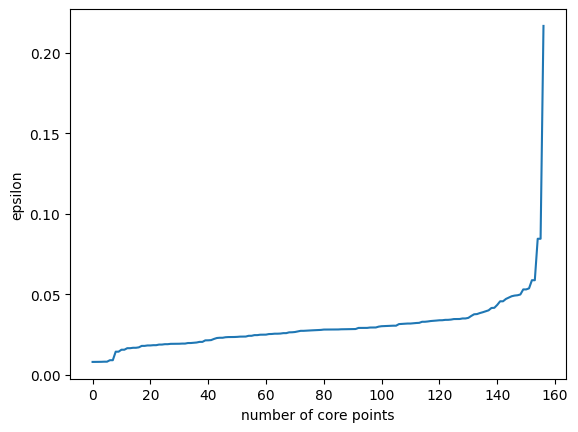

In [490]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(vectors_w2v)
distances, indices = neighbors_fit.kneighbors(vectors_w2v)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('number of core points')
plt.ylabel('epsilon')

In [483]:
db = DBSCAN(eps=0.04, min_samples=4).fit(vectors_w2v)
clusters = db.labels_
clusters

array([-1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1,  0,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
       -1, -1,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        0, -1,  0,  0])

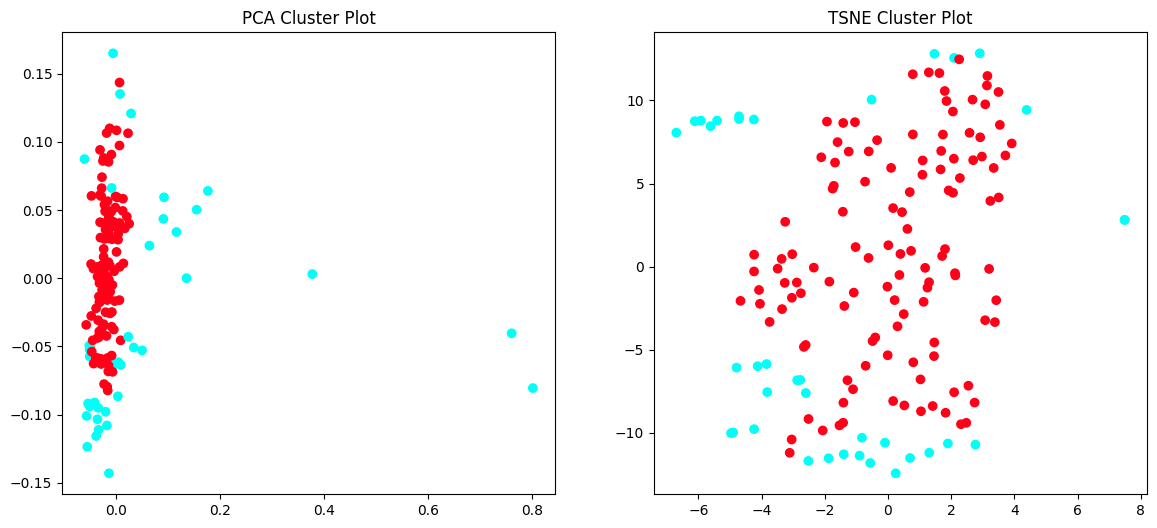

In [484]:
plot_tsne_pca_2d(vectors_w2v, clusters+2)

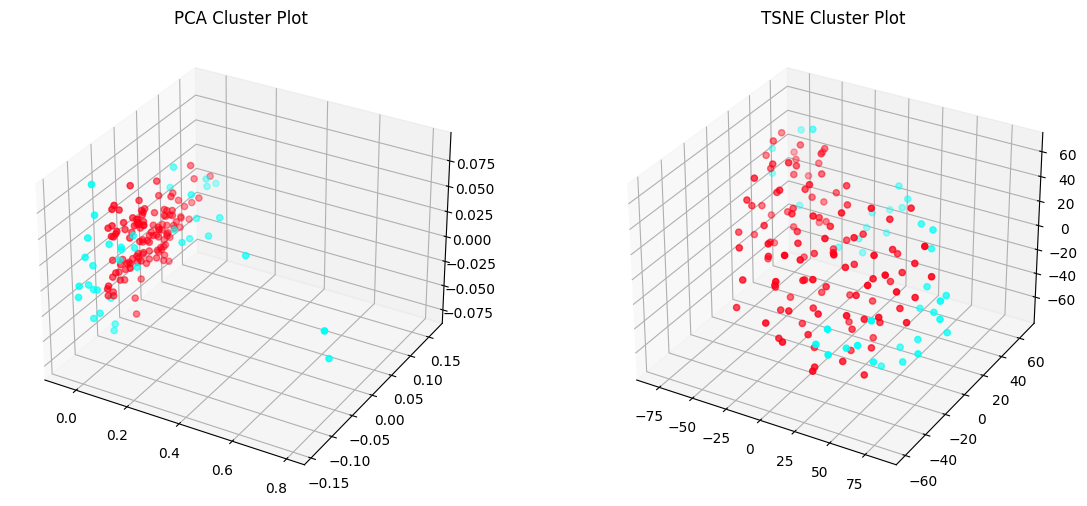

In [485]:
plot_tsne_pca_3d(vectors_w2v, clusters+2)